In [53]:
# Load Dependencies

from matplotlib.gridspec import GridSpec
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import datetime
import warnings
import re
from calendar import month_abbr
import scipy.stats as stats
# from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
# from fast_ml.utilities import display_all
# from fast_ml.feature_selection import get_constant_features
# from sklearn.feature_selection import VarianceThreshold
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OrdinalEncoder
# from sklearn.preprocessing import LabelEncoder

plt.style.use('ggplot')
%matplotlib inline
color = sns.color_palette()

warnings.filterwarnings("ignore")



# Set plot styles
plt.style.use("ggplot")
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
color = sns.color_palette()

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
sns.set_context('talk')


print('libraries imported successfully')


%run utils.ipynb

libraries imported successfully
Util Libraries successfully imported


In [54]:
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [55]:
old = pd.read_csv('2.0 lite loans after behavioral analysis.csv')


data = pd.read_csv('lite ntb.csv')
# data['GBFlag'] = np.where(data['MaxDPD']>=61, 'Bad', 'Good')

In [56]:
data['incomplete BS'] = np.where((data['total_debit_4'].isna() & data['total_credit_4'].isna()), 1, 0)
data = data[data['incomplete BS']==0]
data.shape

(8238, 549)

In [59]:
data = data[data['DisbMonth']=='3/1/2022']
data.shape

(939, 549)

In [60]:



# #convert columns

old_data_columns = [col for col in old.columns]


def convert_from_lower_to_upper(df1, list):
    
    '''
    function to map old ss variable name to new one for PSI
    '''
    
    res= [col for col in df1.columns]
    a = len(res)
    
    while a>0:
        for var in res:
            for var1 in list:
                if var == var1.lower():
                    df1.rename(columns = {var: var1}, inplace = True)
                    
        a-=1
    return df1
data = convert_from_lower_to_upper(data, old_data_columns)
data.shape

(939, 549)

In [61]:
data.head(2)

,Unnamed: 0,BureauData,LoanId,AccountState,AccountSubstate,Product,CreationDate,DisbursementDate,DisbMonth,InitialDecision,InitialDecisionCode,ReasonCode_01,Age,DocumentType,DTI,EducationStatus,EmployerLGA,EmployerState,Gender,Income,Industry,LoanAmount,MaritalStatus,NoChildren,RepaymentBank,RepaymentMethod,AddresLGA,ResidentialStatus,Term,TimeEmploymentMM,TotalNumberAccountsInGoodStanding,TotalNumberOfAccounts,TotalMonthlyInstallments,TotalNumberOfAccountsInArrs,TotalNumberOfAccountsMoreThan90,HighestReportedMonthsInArrs,TotalNumberOfJudgments,TotalOutstandingDebt,TotalTimeAtAddress,WorstStatus,BusinessSector,EmploymentPosition,GBFlag,MaxDPD,(DueDate) FPD,FPD,Closeddate,MaturityDate,EarlySettlementFlg,WeekDay,DayOfTheMonth,timeindayselect,MobileNetwork,Email,ClientFullName,FirstRD,CreditScore,FirstDD,Channels,InterestRate,Acct_Duratn,clientID,Unnamed: 61,minDisbursementDate,2MinCreditWk,2MinNumCreditWk,Agency_Banking_Count_1,Agency_Banking_Count_2,Agency_Banking_Count_3,Agency_Banking_Count_4,Agency_Banking_Count_5,Agency_Banking_Count_6,Agency_Banking_Count_7,Airtime_Payments_Amnt_1,Airtime_Payments_Amnt_2,Airtime_Payments_Amnt_3,Airtime_Payments_Amnt_4,Airtime_Payments_Amnt_5,Airtime_Payments_Amnt_6,Airtime_Payments_Amnt_7,averageBalance,averageCredit,averageDebit,averageLoanRepayment,AvgBalanceMn,AvgBalancewk,AvgCreditMn,AvgCreditwk,AvgDebitMn,AvgDebitwk,AvgNumCreditMn,AvgNumCreditWk,AvgNumDebitMn,AvgNumDebitWk,balanceMonth,bankChargesCount,bankChargesSum,Banking_Fees_1,Banking_Fees_2,Banking_Fees_3,Banking_Fees_4,Banking_Fees_5,Banking_Fees_6,Banking_Fees_7,Banking_Fees_Freq_1,Banking_Fees_Freq_2,Banking_Fees_Freq_3,Banking_Fees_Freq_4,Banking_Fees_Freq_5,Banking_Fees_Freq_6,Banking_Fees_Freq_7,Closing_balance,COT_SMS_Charge,Cre_gr_eq_1,Cre_gr_eq_2,Cre_gr_eq_3,Cre_gr_eq_4,Cre_gr_eq_5,Cre_gr_eq_6,Cre_gr_eq_7,CreationDate,creditMonth,Crypto_pay_freq_1,Crypto_pay_freq_2,Crypto_pay_freq_3,Crypto_pay_freq_4,Crypto_pay_freq_5,Crypto_pay_freq_6,Crypto_pay_freq_7,Day_Diff_Credit,Day_Diff_Debit,debitMonth,DisbursementDate,DTI_Amount,Dud_cheques_sum1,Dudchequescount,dy_wit_hghst_freq_of_dbt_distr_1,dy_wit_hghst_freq_of_dbt_distr_2,dy_wit_hghst_freq_of_dbt_distr_3,dy_wit_hghst_freq_of_dbt_distr_4,dy_wit_hghst_freq_of_dbt_distr_5,dy_wit_hghst_freq_of_dbt_distr_6,dy_wit_hghst_freq_of_dbt_distr_7,dy_wt_hghst_freq_of_dbt_distr_a1,dy_wt_hghst_freq_of_dbt_distr_a2,dy_wt_hghst_freq_of_dbt_distr_a3,dy_wt_hghst_freq_of_dbt_distr_a4,dy_wt_hghst_freq_of_dbt_distr_a5,dy_wt_hghst_freq_of_dbt_distr_a6,dy_wt_hghst_freq_of_dbt_distr_a7,Fuel_freq_1,Fuel_freq_2,Fuel_freq_3,Fuel_freq_4,Fuel_freq_5,Fuel_freq_6,Fuel_freq_7,Fuel_payment_1,Fuel_payment_2,Fuel_payment_3,Fuel_payment_4,Fuel_payment_5,Fuel_payment_6,Fuel_payment_7,Geo_freq_1,Geo_freq_2,Geo_freq_3,Geo_freq_4,Geo_freq_5,Geo_freq_6,Geo_freq_7,highest_single_credit_amount_1,highest_single_credit_amount_2,highest_single_credit_amount_3,highest_single_credit_amount_4,highest_single_credit_amount_5,highest_single_credit_amount_6,highest_single_credit_amount_7,highest_single_debit_amount_1,highest_single_debit_amount_2,highest_single_debit_amount_3,highest_single_debit_amount_4,highest_single_debit_amount_5,highest_single_debit_amount_6,highest_single_debit_amount_7,hugeSumPaid,Inconsistent_Salary_Date,inconsistentSalaryDescription,Insurance_freq_1,Insurance_freq_2,Insurance_freq_3,Insurance_freq_4,Insurance_freq_5,Insurance_freq_6,Insurance_freq_7,International_Remittances_Amnt_1,International_Remittances_Amnt_2,International_Remittances_Amnt_3,International_Remittances_Amnt_4,International_Remittances_Amnt_5,International_Remittances_Amnt_6,International_Remittances_Amnt_7,International_Remittances_Freq_1,International_Remittances_Freq_2,International_Remittances_Freq_3,International_Remittances_Freq_4,International_Remittances_Freq_5,International_Remittances_Freq_6,International_Remittances_Freq_7,IntlRemittancesAmnt1,IntlRemittancesAmnt2,IntlRemittancesAmnt3,IntlRemittancesAmnt4,IntlRemittances

### Variance Threshold

Variance Threshold is a feature selector that removes all the low variance features from the dataset that are of no great use in modeling. It looks only at the features (x), not the desired outputs/target (y), and can thus be used for unsupervised learning.

  - High Variance in predictors: Good Indication
  - Low Variance predictors: Not good for model
We can drop constant features using Sklearn’s Variance Threshold. Default Value of Threshold is 0


    -  If Variance Threshold = 0 (Remove Constant Features )
    -  If Variance Threshold > 0 (Remove Quasi-Constant Features )
      

  - Constant Feature: Same value in all the records.
  - Quasi Constant Feature: One of the values is dominant 99.9%.

In [62]:
# constant_features = get_constant_features(data, threshold=0.98, dropna=False)
# constant_features



In [63]:
# # # All the constant features stored in a list
# constant_features = pd.read_csv('constant and quasi constant variables for lite loans 2022-04-22.csv')
# constant_features_list = constant_features['Variable'].to_list()


In [64]:
# # # Drop all the constant features from the dataset
# data.drop(columns = constant_features_list, inplace=True)

# data.head(1)

In [65]:
data.shape

(939, 549)

In [66]:
data.drop_duplicates(subset='LoanId', keep='first', inplace=True)
data.shape

(939, 549)

In [67]:
# #fill missing value
# data = data.fillna(0)

In [68]:

# data['MaxDPD'] = data['MaxDPD'].astype(float)
# data['GBFlag'] = np.where( data['MaxDPD']>=61, 'Bad', 'Good')
# data['GBFlag'].value_counts()

In [69]:
# audit(data)

## Feature Engineering
This additional features are required for development for our bankstatement-led POC Lite loan credit scoring model. We aim to explore and observe the potentials associated with having most of the salary service variables. We would also obtain some derived features or crossed variables from the applications and bank statement population.

 we merge sample data that do not include the indefinite customer category(early settlmt 1) and all salary service variable of interest

#### New Derived Variables from SS and Applications Data Variables 
We will obtain more new variables we believe have some potential for building the lite loan POC Scorecard.

In [70]:
data['TV Sub'] = np.where((data['Tv_freq_1'].notna()) |(data['Tv_freq_2'].notna()) | (data['Tv_freq_3'].notna()) | (data['Tv_freq_4'].notna()), 1, 0)


#### Tv Subscription

In [71]:
data.shape

(939, 550)

### Grouped variables

##### Address LGA

In [72]:
#Address LGA

Oyo = ['Akinyele', 'Afijio', 'Egbeda', 'Ibadan North','Ibadan Central', 'Ibadan North East', 'Ibadan North West', 'Ibadan South West', 'Ibadan South East', 'Ibarapa Central',
       'Ibarapa East', 'Ido', 'Irepo', 'Iseyin', 'Kajola', 'Lagelu', 'Ogbomosho North', 'Ogbomosho South', 'Oyo West', 'Atiba', 'Atigbo', 'Saki West', 
       'Lagelu Ogbomosho North', 'Ogbmosho South', 
       'Saki East', 'Itesiwaju', 'Iwajowa', 'Ibarapa North', 'Olorunsogo', 'Oluyole', 'Ogo Oluwa', 'Surulere', 'Orelope', 'Ori Ire', 'Oyo East', 'Ona Ara']

Delta = ['Aniocha North','Aniocha South','Bomadi','Burutu','Ethiope West','Ethiope east','Ika North East','Ika South','Isoko North','Isoko South','Ndokwa East',
'Ndokwa West','Okpe','Oshimili North','Oshimili','Oshimilli South', 'Oshimili South','Patani','Sapele','Udu','Ughelli North','Ughelli South','Ukwuani','Uvwie','Warri North','Warri South', 'Asaba', 'Warri Central']


Edo = ['Akoko-Edo','Esan Central','Esan North-East','Egor','Esan South-East','Esan West','Etsako Central','Etsako East','Igueben','Etsako West','Ikpoba-Okha','Oredo',
'Orhionmwon','Ovia North-East','Ovia South-West','Owan East','Owan West','Uhunmwonde', 'Benin']


Kaduna = [
'Birnin Gwari',

'Chikun',

'Giwa',

'Igabi',

'Jaba',
'Jema',

'Kachia',
'Kaduna North',
'Kaduna South',

'Kagarko',
'Kajuru',
'Kaura',
'Kaduna',
'Kubau',
'Kudan',

'Lere',

'Makarfi',

'Sabon Gari',
'Sanga',
'Soba',

'Zangon Kataf',
'Zaria']


Rivers = ['Abua/odual','Obia/Akpor'
'Ahoada East','Ahoada West','Akuku Toru','Andoni','Asari-toru','Bonny','Degema','Eleme','Emohua','Etche','Gokana','Ikwerre','Khana','Obio/akpor',
'Ogba/egbema/ndoni','Ogu/bolo','Okrika','Omuma', 'Opobo/nkoro', 'Oyigbo', 'Port Harcourt','Port-Harcourt',
'Tai']

Ogun = ['Abeokuta North',
        'Ado','Ogun Waterside', 
'Abeokuta South',
'Ado-Odo/Ota',
'Ado Odo/Ota',
'Ewekoro',
'Ifo',
'Ijebu East',
'Ijebu North',

'Ijebu North East',
'Ijebu Ode',
'Ikenne',
'Imeko/afon',
'Ipokia',
'Obafemi/owode',
'Obafemi-Owode',
'Odeda',
'Odogbolu',
'Ogun Water Side',
'Remo North',
'Sagamu',
'Shagamu',
'Yewa', 'Egbado North',
'Egbado South'
]

# LGA in each state
FCT = [
    'Gwagwalada',
    'Kuje',
    'Abaji',
    'Abuja Municipal',
    'Bwari',
    'Kwali'
]


lagos_mainland = [
    'Alimosho',
    'Ikorodu',
    'Agege',
    'Kosofe',
    'Ifako-Ijaye',
    'Lagos Mainland',
    'Ikeja',
    'Oshodi-Isolo',
    'Surulere',
    'Shomolu',
    'Amuwo-Odofin',
    'Ojo',
    'Mushin',
    'Apapa',
    'Badagry',
    'Ajeromi-Ifelodun',
    'Egbeda',
]

lagos_island = [
    'Eti-Osa',
    'Ibeju/Lekki',
    'Eti Osa',
    'Lagos Island',
    'Epe',
]
# Regroup Address LGA
data['AddresLGA_grped'] = np.where(
    data['AddresLGA'].isin(FCT), 'FCT', np.where(
    data['AddresLGA'].isin(lagos_mainland), 'Lagos Mainland', np.where(
    data['AddresLGA'].isin(lagos_island), 'Lagos Island', np.where(
    data['AddresLGA'].isin(Rivers), 'Rivers', np.where(
    data['AddresLGA'].isna(), 'Null', 'Others')))))

data.AddresLGA_grped.value_counts()



Lagos Mainland    395
Others            346
FCT               102
Lagos Island       67
Rivers             26
Null                3
Name: AddresLGA_grped, dtype: int64

In [77]:
data['MaxDPD'].isna().sum()

0

In [80]:
data['MaxDPD'] = data['MaxDPD'].astype(str)
data['GBFlag'] = np.where(data['MaxDPD']>=61, 'Bad', 'Good')

TypeError: '>=' not supported between instances of 'str' and 'int'

In [73]:

ES1 = pd.crosstab(data['AddresLGA_grped'], data['GBFlag'])
ES1['Bad Rate(%)']= ES1['Bad']/ES1.sum(axis=1) *100
ES1.sort_values('Bad Rate(%)', ascending=False)

KeyError: 'Bad'

In [ ]:
woe_cat(data, 'AddresLGA_grped', 'GBFlag')

GBFlag,Bad,Good,Freq,Proptn,% Good,% Bad,Bad Rate,GoodBaddOdds,WOE,class IV,Variable IV
AddresLGA_grped,,,,,,,,,,,
Lagos Island,0,566,566,0.069,0.069,0.000,0.000,inf,-inf,inf,inf
Null,0,26,26,0.003,0.003,0.000,0.000,inf,-inf,inf,inf
Others,8,3131,3139,0.381,0.381,0.276,0.003,391.380,-0.324,0.034,inf
Lagos Mainland,14,3213,3227,0.392,0.391,0.483,0.004,229.500,0.210,0.019,inf
FCT,5,990,995,0.121,0.121,0.172,0.005,198.000,0.357,0.019,inf
Rivers,2,283,285,0.035,0.034,0.069,0.007,141.500,0.693,0.024,inf


##### Employer's LGA

In [ ]:

# Regroup Employer's LGA
data['EmployerLGA_grped'] = np.where(
    data['EmployerLGA'].isin(FCT), 'FCT', np.where(
    data['EmployerLGA'].isin(lagos_mainland), 'Lagos Mainland', np.where(
    data['EmployerLGA'].isin(lagos_island), 'Lagos Island', np.where(
    data['EmployerLGA'].isin(Rivers), 'Rivers', np.where(
    data['EmployerLGA'].isna(), 'Null', 'Others')))))


data['EmployerLGA_grped'].value_counts()

Lagos Mainland    2882
Others            2443
FCT               1637
Lagos Island       657
Null               343
Rivers             276
Name: EmployerLGA_grped, dtype: int64

In [ ]:

ES1 = pd.crosstab(data['EmployerLGA_grped'], data['GBFlag'])
ES1['Bad Rate(%)']= ES1['Bad']/ES1.sum(axis=1) *100
ES1.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
EmployerLGA_grped,,,
Rivers,2,274,0.725
Lagos Mainland,13,2869,0.451
FCT,7,1630,0.428
Others,7,2436,0.287
Lagos Island,0,657,0.000
Null,0,343,0.000


##### Employer's State

In [ ]:

# Regroup Employer State
data['EmployerState_grped'] = np.where(
    data['EmployerState']=='Lagos', 'Lagos', np.where(
    data['EmployerState']=='FCT', 'FCT', np.where(
    data['EmployerState']=='Rivers', 'Rivers','Others-Null')))

#null variables were just 15, better to group it with others
data['EmployerState_grped'].value_counts()

Lagos          3537
Others-Null    2728
FCT            1654
Rivers          319
Name: EmployerState_grped, dtype: int64

In [ ]:

ES1 = pd.crosstab(data['EmployerState_grped'], data['GBFlag'])
ES1['Bad Rate(%)']= ES1['Bad']/ES1.sum(axis=1) *100
ES1.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
EmployerState_grped,,,
Rivers,2,317,0.627
FCT,7,1647,0.423
Lagos,13,3524,0.368
Others-Null,7,2721,0.257


##### Marital Status

In [ ]:
# Regroup Marital status
data['MaritalStatus_grped'] = np.where(
    data['MaritalStatus'].isin(['Married','Civil Marriage']), 'Married', np.where(
    data['MaritalStatus'].isin(['Single']), 'Single',np.where(
    data['MaritalStatus'].isna(), 'Null', 'Other')))

data['MaritalStatus_grped'].value_counts()

Married    4326
Single     3863
Other        49
Name: MaritalStatus_grped, dtype: int64

In [ ]:

ES1 = pd.crosstab(data['MaritalStatus_grped'], data['GBFlag'])
ES1['Bad Rate(%)']= ES1['Bad']/ES1.sum(axis=1) *100
ES1.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
MaritalStatus_grped,,,
Married,17,4309,0.393
Single,12,3851,0.311
Other,0,49,0.000


##### Business Sector

In [ ]:
# Regroup Business Sector
data['BusinessSector_grped'] = np.where(
    data['BusinessSector'].isin(['General','Null']), 'Null',np.where(
    data['BusinessSector'].isin([
        'Agriculture',
        'Poultry Farmers',
        'Organic Farming',
        'Part Time Farmers',
        'Pig Farmers',
        'Dairy',
        'Dairy Produce',
        'Tillage',
        'Forestry',
        'Dry Stock'
    ]), 'Agriculture',np.where(
    data['BusinessSector'].isin(['Oil and Gas','Power and Energy','Natural Resources']), 'Oil and Gas',np.where(
    data['BusinessSector'].isin([
        'Services',
        'Manufacturing',
        'Professional, scientific and technical activities',
        'Waste Management Activities',
        'Arts, entertainment and recreation',
        'Mechanics',
        'Light Engineering',
        'Plumbers',                                          
        'Carpenters',                                          
        'Joinery',                                              
        'Clothing',
        'Non-Governmental Organization',
        'Mining and Quarrying',
        'Extraterritorial organizations',
        'Electricians',
        'Administrative and support service activities',
        'Transportation and storage',
        'Utilities',
        'Hotels and Catering',
        'Wholesale and retail trade',
        'Government',
        'Police and Security',
        'Ministry',
        'Local Government',
        'Government Agency'
    ]), 'Services',np.where(
    data['BusinessSector'].isin([
        'Construction',
        'Real estate activities',
        'Civil Engineering',
        'Builders',
        'Architect'
    ]), 'Construction/Real Estate',np.where(
    data['BusinessSector'].isin(['Education','Institution Staff','Books']), 'Education',np.where(
    data['BusinessSector'].isin([
        'Consumer Goods',
        'Food and Groceries',
        'Restaurants',
        'Household Goods'
    ]), 'Consumer Goods',np.where(
    data['BusinessSector'].isin(['Finance','Banks','Insurance']), 'Financial Services',np.where(
    data['BusinessSector'].isin(['Human health and social work activities','Healthcare','Medical']), 'Healthcare',np.where(
    data['BusinessSector'].isin(['Industrial Goods','Hardware']), 'Industrial Goods',np.where(
    data['BusinessSector'].isin([
        'Information and communication',
        'Online'
    ]), 'Information and Communications Technology',data['BusinessSector'])))))))))))


data['BusinessSector_grped'].value_counts()


Services                                     3195
Agriculture                                  1010
Construction/Real Estate                      731
Null                                          615
Consumer Goods                                558
Information and Communications Technology     527
Education                                     513
Financial Services                            373
Oil and Gas                                   335
Healthcare                                    266
Industrial Goods                              114
Other                                           1
Name: BusinessSector_grped, dtype: int64

In [ ]:

ES1 = pd.crosstab(data['BusinessSector_grped'], data['GBFlag'])
ES1['Bad Rate(%)']= ES1['Bad']/ES1.sum(axis=1) *100
ES1.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
BusinessSector_grped,,,
Industrial Goods,1,113,0.877
Consumer Goods,4,554,0.717
Information and Communications Technology,3,524,0.569
Financial Services,2,371,0.536
Healthcare,1,265,0.376
Services,11,3184,0.344
Oil and Gas,1,334,0.299
Agriculture,3,1007,0.297
Education,1,512,0.195


##### Education Status

In [ ]:

# Regroup Educational status
data['EducationStatus_grped'] = np.where(
    data['EducationStatus'].isin(['Graduate', 'HND']), 'Graduate', np.where(
    data['EducationStatus'].isin(['Post Graduate']), 'Post Graduate', np.where(
    data['EducationStatus'].isin(['Primary','Secondary']), 'Primary and Secondary',np.where(
    data['EducationStatus'].isin(['Other']), 'Other',data['EducationStatus']))))

data['EducationStatus_grped'].value_counts()

Graduate                 5476
Primary and Secondary    1735
Post Graduate            1025
Null                        2
Name: EducationStatus_grped, dtype: int64

In [ ]:

ES1 = pd.crosstab(data['EducationStatus_grped'], data['GBFlag'])
ES1['Bad Rate(%)']= ES1['Bad']/ES1.sum(axis=1) *100
ES1.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
EducationStatus_grped,,,
Primary and Secondary,7,1728,0.403
Graduate,19,5457,0.347
Post Graduate,3,1022,0.293
Null,0,2,0.000


##### Document Type

In [ ]:
# regroup document type
data['DocumentType_grped'] = np.where(
    data['DocumentType'].isin(['NIN','National ID','National Identity Number','NIMC ID Card','Voters Identity Card', 'Social Security Card']), 'National ID', np.where(
    data['DocumentType'].isin(['Drivers License','Drivers Licence']), 'Drivers License', np.where(
    data['DocumentType'].isin(['International Passport','Passport']), 'Intn\'l Passport', np.where(
    data['DocumentType'].isin(['BVN']),'BVN', 'Others-Null'))))

data['DocumentType_grped'].value_counts()

Others-Null        3901
National ID        2854
BVN                 560
Intn'l Passport     483
Drivers License     440
Name: DocumentType_grped, dtype: int64

In [ ]:

ES1 = pd.crosstab(data['DocumentType_grped'], data['GBFlag'])
ES1['Bad Rate(%)']= ES1['Bad']/ES1.sum(axis=1) *100
ES1.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
DocumentType_grped,,,
Intn'l Passport,3,480,0.621
Others-Null,17,3884,0.436
BVN,2,558,0.357
National ID,7,2847,0.245
Drivers License,0,440,0.000


#### Residential Status

In [ ]:
data['ResidentialStatus'] = np.where(data['ResidentialStatus'].isin(['With Relatives', 'With Friends']), 'Squating', data['ResidentialStatus'])


ES1 = pd.crosstab(data['ResidentialStatus'], data['GBFlag'])
ES1['Bad Rate(%)']= ES1['Bad']/ES1.sum(axis=1) *100
ES1.sort_values('Bad Rate(%)', ascending=False)


GBFlag,Bad,Good,Bad Rate(%)
ResidentialStatus,,,
Owner,12,2465,0.484
Renting,16,4870,0.327
Squating,1,864,0.116


### Fine classing and Coarse Classing

In [ ]:
# data = data.fillna(0)

##### Age

In [ ]:
data['Age'] = data['Age'].astype(int)
## Fine Classsing (Age)
data['Age_binned'] = np.where((data['Age']>17) & (data['Age']<29), '(-6.0, 28.0]',
np.where((data['Age']>28) & (data['Age']< 34), '(28.0, 33.0]',
np.where((data['Age']>33) & (data['Age']<40), '(33.0, 39.0]', '(39.0, 65.0]')))

In [ ]:
# df_age =woe_num(data,'Age_binned', 'GBFlag')

In [ ]:
# df_age

In [ ]:
# plot_by_woe(df_age)
#Using drop() to delete rows based on column value
data.drop(data[data['Age'].isna()].index, inplace = True)
data['Age'] = data['Age'].astype(int)


In [ ]:
data = data[~(data['Age']<18)]

In [ ]:
data.shape

(8228, 558)

In [ ]:
# # Bin Age

# bins = [18, 26, 32, 34,  40, 44, 66]
# data['Age_binned'] = pd.cut(data['Age'], bins, precision=0, include_lowest=True, right=False)
# data['Age_binned'].value_counts()

In [ ]:

ES1 = pd.crosstab(data['Age_binned'], data['GBFlag'])
ES1['Bad Rate(%)']= ES1['Bad']/ES1.sum(axis=1) *100
ES1.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
Age_binned,,,
"(33.0, 39.0]",7,1549,0.450
"(-6.0, 28.0]",14,3302,0.422
"(28.0, 33.0]",5,1937,0.257
"(39.0, 65.0]",3,1411,0.212


In [ ]:
woe_cat(data,'Age_binned', 'GBFlag')

GBFlag,Bad,Good,Freq,Proptn,% Good,% Bad,Bad Rate,GoodBaddOdds,WOE,class IV,Variable IV
Age_binned,,,,,,,,,,,
"(39.0, 65.0]",3,1411,1414,0.172,0.172,0.103,0.002,470.330,-0.509,0.035,0.082
"(28.0, 33.0]",5,1937,1942,0.236,0.236,0.172,0.003,387.400,-0.315,0.020,0.082
"(-6.0, 28.0]",14,3302,3316,0.403,0.403,0.483,0.004,235.860,0.181,0.015,0.082
"(33.0, 39.0]",7,1549,1556,0.189,0.189,0.241,0.004,221.290,0.245,0.013,0.082


##### Income

In [ ]:
# data['Income'] =data['Income'].astype(int)
## Fine Classsing (Income)
# data['Income_binned'] = pd.qcut(data['Income'], q=4,  precision=0,duplicates='drop')
data['Income_binned'] = np.where((data['Income'].between(19999, 70000)), '(19999.0, 70000.0]',
np.where(data['Income'].between(69999, 104250), '(70000.0, 104250.0]',
np.where(data['Income'].between(104249, 200000), '(104250.0, 200000.0]', '(200000.0, 500000000.0]')))

TypeError: '>=' not supported between instances of 'str' and 'int'

In [ ]:
# plot_by_woe(df_income, 90)

In [ ]:
# Bin Age

bins = [20000, 50001, 90001, 104001, np.inf]
data['Income_grped'] = pd.cut(data['Income'], bins, precision=0, include_lowest=True, right=False)
data['Income_grped'].value_counts()

[104001.0, inf)        2008
[50001.0, 90001.0)      840
[20000.0, 50001.0)      705
[90001.0, 104001.0)     463
Name: Income_grped, dtype: int64

In [ ]:

ES1 = pd.crosstab(data['Income_grped'], data['GBFlag'])
ES1['Bad Rate(%)']= ES1['Bad']/ES1.sum(axis=1) *100
ES1.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
Income_grped,,,
"[20000.0, 50001.0)",249,456,35.319
"[90001.0, 104001.0)",134,329,28.942
"[50001.0, 90001.0)",225,615,26.786
"[104001.0, inf)",477,1531,23.755


In [ ]:
woe_cat(data, 'Income_grped', 'GBFlag')

GBFlag,Bad,Good,Freq,Proptn,% Good,% Bad,Bad Rate,GoodBaddOdds,WOE,class IV,Variable IV
Income_grped,,,,,,,,,,,
"[104001.0, inf)",477,1531,2008,0.500,0.522,0.440,0.238,3.210,-0.172,0.014,0.044
"[50001.0, 90001.0)",225,615,840,0.209,0.210,0.207,0.268,2.730,-0.012,0.000,0.044
"[90001.0, 104001.0)",134,329,463,0.115,0.112,0.124,0.289,2.460,0.096,0.001,0.044
"[20000.0, 50001.0)",249,456,705,0.176,0.156,0.229,0.353,1.830,0.389,0.029,0.044


In [ ]:
data1 = data['TotalTimeAtAddress'].dropna()
data1.shape

(3896,)

##### total time at address

In [ ]:
# data['TotalTimeAtAddress'] = data['TotalTimeAtAddress'].astype('int')
## Fine Classsing (Income)
data['TimeatAddress_binned'] = pd.qcut(data['TotalTimeAtAddress'], q=4,  precision=0,duplicates='drop')
df_timeadd = woe_num(data,'TimeatAddress_binned', 'GBFlag')
df_timeadd

GBFlag,Bad,Good,Freq,Percentage,% Good,% Bad,Bad Rate,GoodBaddOdds,WOE,IV
TimeatAddress_binned,,,,,,,,,,
"(-1.0, 56.0]",259,742,1001,25.700,25.800,25.500,25.900,2.860,0.012,0.004
"(56.0, 105.0]",243,705,948,24.300,24.500,23.900,25.600,2.900,0.025,0.015
"(105.0, 220.0]",254,722,976,25.100,25.100,25.000,26.000,2.840,0.004,0.000
"(220.0, 2904.0]",259,712,971,24.900,24.700,25.500,26.700,2.750,-0.032,0.026


In [ ]:
# Bin Age

bins = [0, 57, 107, 150,  np.inf]
data['TotalTimeAtAddress_grped'] = pd.cut(data['TotalTimeAtAddress'], bins, precision=0, include_lowest=True, right=False)
data['TotalTimeAtAddress_grped'].value_counts()

[150.0, inf)      1435
[0.0, 57.0)       1001
[57.0, 107.0)      964
[107.0, 150.0)     496
Name: TotalTimeAtAddress_grped, dtype: int64

##### time in Employment

In [ ]:
data['TimeEmploymentMM'] =data['TimeEmploymentMM'].astype('int')
## Fine Classsing (Income)
data['TimeEmploymentMM_binned'] = pd.qcut(data['TimeEmploymentMM'], q=8,  precision=0,duplicates='drop')
df_empl= woe_num(data,'TimeEmploymentMM_binned', 'GBFlag')
df_empl

GBFlag,Bad,Good,Freq,Percentage,% Good,% Bad,Bad Rate,GoodBaddOdds,WOE,IV
TimeEmploymentMM_binned,,,,,,,,,,
"(-4.0, 17.0]",154,366,520,12.900,12.500,14.200,29.600,2.380,-0.128,0.217
"(17.0, 30.0]",126,390,516,12.800,13.300,11.600,24.400,3.100,0.137,0.232
"(30.0, 39.0]",136,342,478,11.900,11.700,12.500,28.500,2.510,-0.066,0.053
"(39.0, 51.0]",150,346,496,12.400,11.800,13.800,30.200,2.310,-0.157,0.313
"(51.0, 68.0]",144,368,512,12.700,12.600,13.300,28.100,2.560,-0.054,0.038
"(68.0, 89.0]",138,366,504,12.500,12.500,12.700,27.400,2.650,-0.016,0.003
"(89.0, 133.0]",126,364,490,12.200,12.400,11.600,25.700,2.890,0.067,0.053
"(133.0, 497.0]",111,389,500,12.500,13.300,10.200,22.200,3.500,0.265,0.823


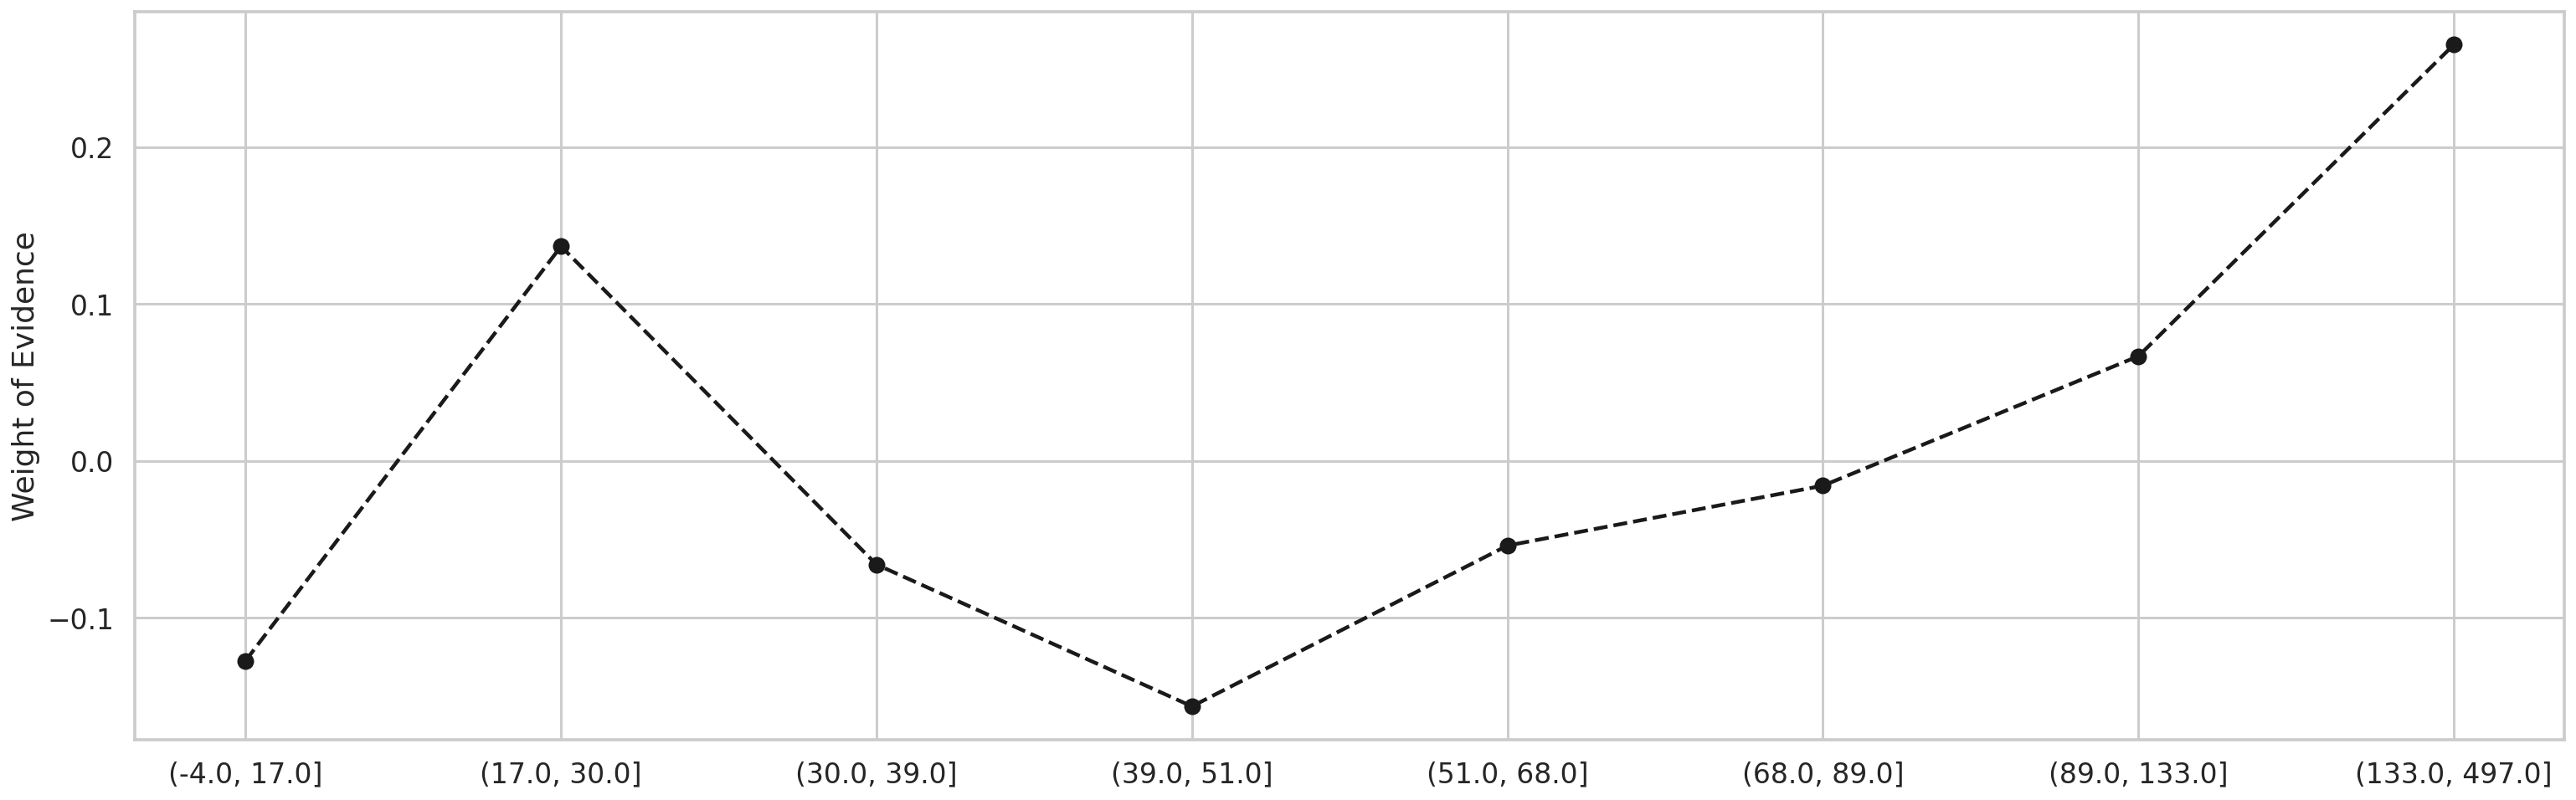

In [ ]:
plot_by_woe(df_empl)

In [ ]:
# Bin 

bins = [0, 18, 31, 90, 134,  np.inf]
data['TimeEmploymentMM_grped'] = pd.cut(data['TimeEmploymentMM'], bins, precision=0, include_lowest=True, right=False)
data['TimeEmploymentMM_grped'].value_counts()

[31.0, 90.0)     1990
[0.0, 18.0)       517
[18.0, 31.0)      516
[134.0, inf)      500
[90.0, 134.0)     490
Name: TimeEmploymentMM_grped, dtype: int64

#### Timeindayselect

In [ ]:
woe_cat(data, 'timeindayselect', 'GBFlag')

GBFlag,Bad,Good,Freq,Proptn,% Good,% Bad,Bad Rate,GoodBaddOdds,WOE,class IV,Variable IV
timeindayselect,,,,,,,,,,,
12pm - 2pm,127,417,544,0.135,0.142,0.117,0.233,3.280,-0.195,0.005,0.019
4pm - 6pm,101,312,413,0.103,0.106,0.093,0.245,3.090,-0.134,0.002,0.019
8pm - 00am,126,386,512,0.127,0.132,0.116,0.246,3.060,-0.126,0.002,0.019
8am - 10am,115,321,436,0.109,0.110,0.106,0.264,2.790,-0.033,0.000,0.019
2pm - 4pm,129,338,467,0.116,0.115,0.119,0.276,2.620,0.031,0.000,0.019
10am - 12pm,149,383,532,0.132,0.131,0.137,0.280,2.570,0.050,0.000,0.019
6pm - 8pm,88,226,314,0.078,0.077,0.081,0.280,2.570,0.051,0.000,0.019
6am - 8am,124,275,399,0.099,0.094,0.114,0.311,2.220,0.197,0.004,0.019
Before 6am,126,273,399,0.099,0.093,0.116,0.316,2.170,0.221,0.005,0.019


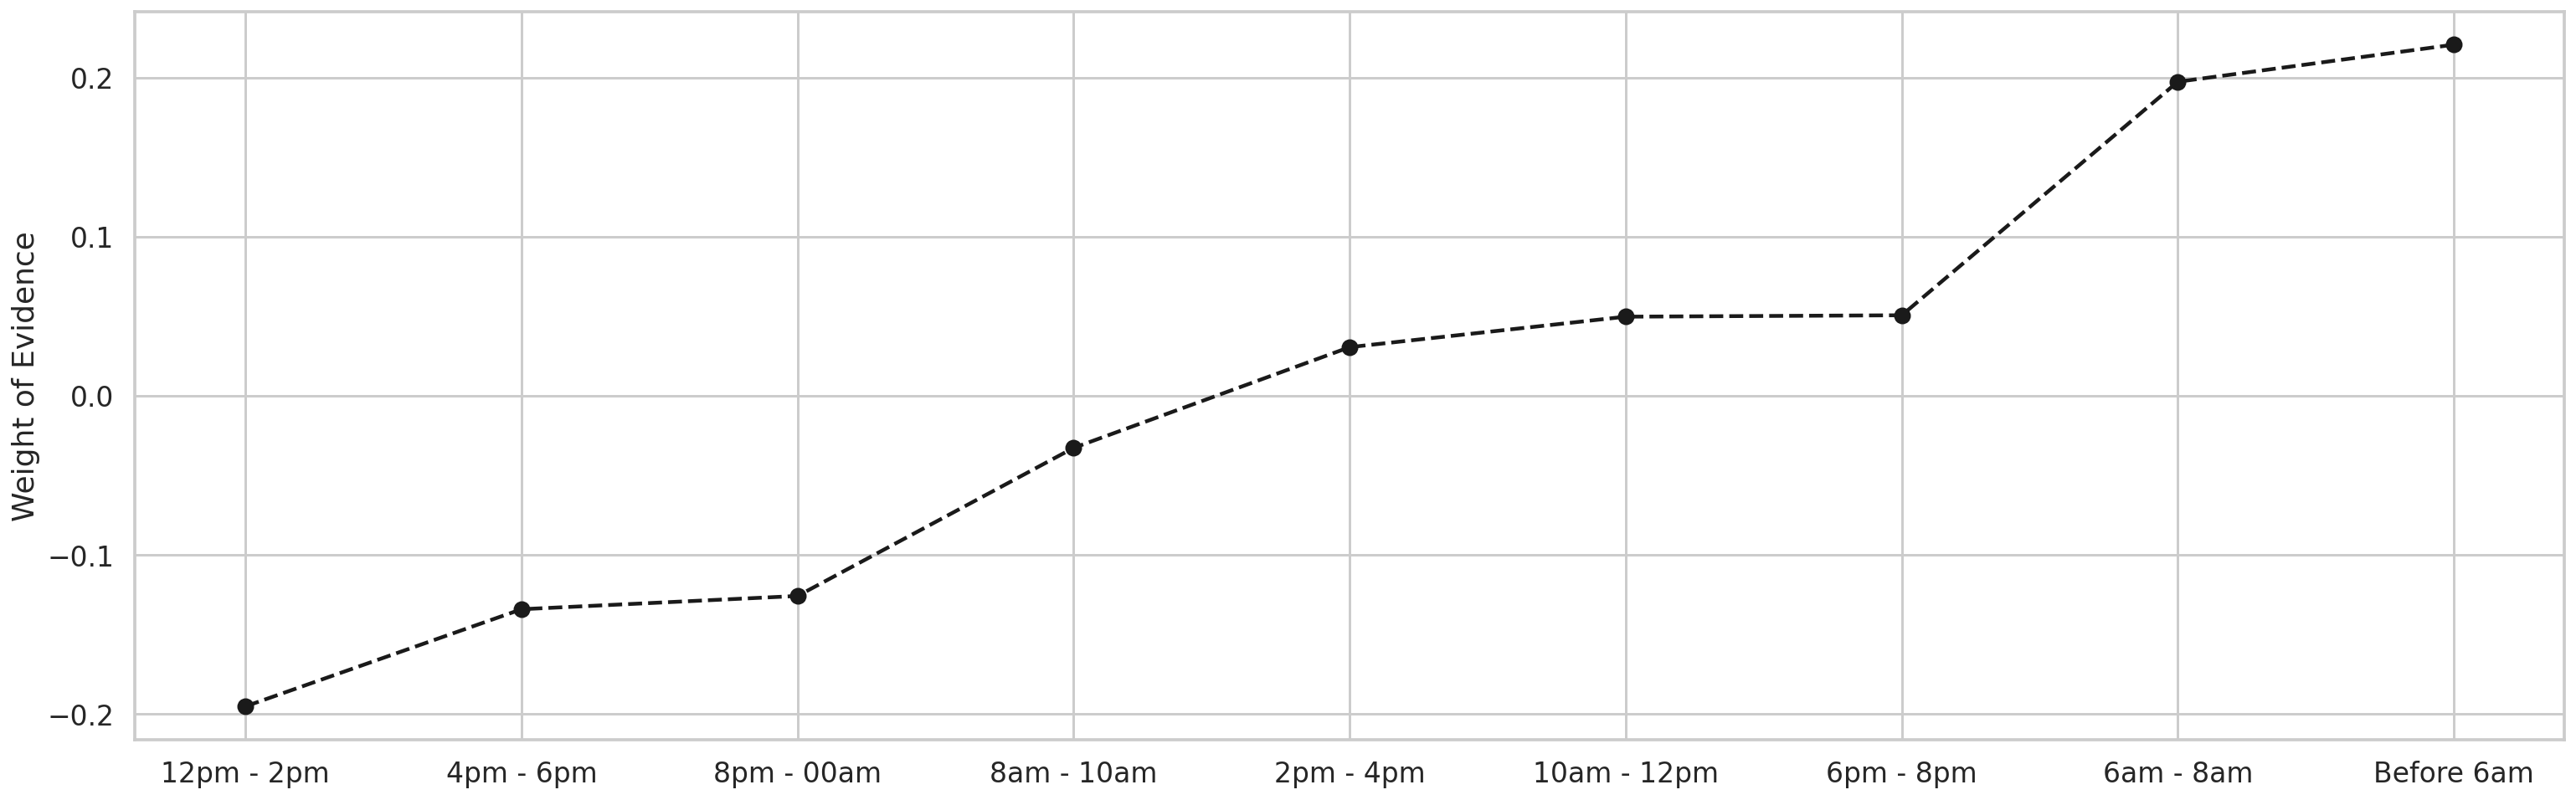

In [ ]:
DA = pd.crosstab(data['timeindayselect'], data['GBFlag'])

DA['Bad Rate(%)']= DA['Bad']/DA.sum(axis=1) *100
DA.sort_values('Bad Rate(%)', ascending=False)
plot_by_woe(woe_cat(data, 'timeindayselect', 'GBFlag'))

In [ ]:
data['timeindayselect_grped'] = np.where(data['timeindayselect'].isin(['12pm - 2pm', '4pm - 6pm', '8pm - 00am']), 'A', 
                                                  np.where(data['timeindayselect'].isin(['8am - 10am', '2pm - 4pm', '10am - 12pm', '6pm - 8pm']), 'B', 'C'))
data['timeindayselect_grped'].value_counts()

B    1749
A    1469
C     798
Name: timeindayselect_grped, dtype: int64

#### Weekday

In [ ]:
woe_num(data, 'WeekDay', 'GBFlag')

GBFlag,Bad,Good,Freq,Percentage,% Good,% Bad,Bad Rate,GoodBaddOdds,WOE,IV
WeekDay,,,,,,,,,,
Friday,147,397,544,13.500,13.500,13.500,27.000,2.700,0.000,0.000
Monday,165,481,646,16.100,16.400,15.200,25.500,2.920,0.076,0.091
Saturday,133,348,481,12.000,11.900,12.300,27.700,2.620,-0.033,0.013
Sunday,135,306,441,11.000,10.400,12.400,30.600,2.270,-0.176,0.352
Thursday,156,471,627,15.600,16.100,14.400,24.900,3.020,0.112,0.190
Tuesday,180,468,648,16.100,16.000,16.600,27.800,2.600,-0.037,0.022
Wednesday,169,460,629,15.700,15.700,15.600,26.900,2.720,0.006,0.001


In [ ]:
data['WeekDay_grped'] = np.where(data['WeekDay'].isin(['Monday', 'Tuesday', 'Wednesday']), 'Mon-Wed',
                                 np.where(data['WeekDay'].isin(['Thursday', 'Friday']), 'Thur-Fri', 'Sat-Sun'))

data.WeekDay_grped.value_counts()

Mon-Wed     1923
Thur-Fri    1171
Sat-Sun      922
Name: WeekDay_grped, dtype: int64

In [ ]:
data.head(1)
#data.to_csv('\\Users\\mfajobi\\Pictures\\main data.csv')

,BureauData,LoanId,AccountState,AccountSubstate,Product,CreationDate,DisbursementDate,DisbMonth,InitialDecision,InitialDecisionCode,ReasonCode_01,Age,DocumentType,DTI,EducationStatus,EmployerLGA,EmployerState,Gender,Income,Industry,LoanAmount,MaritalStatus,NoChildren,RepaymentBank,RepaymentMethod,AddresLGA,ResidentialStatus,Term,TimeEmploymentMM,TotalNumberAccountsInGoodStanding,TotalNumberOfAccounts,TotalMonthlyInstallments,TotalNumberOfAccountsInArrs,TotalNumberOfAccountsMoreThan90,HighestReportedMonthsInArrs,TotalNumberOfJudgments,TotalOutstandingDebt,TotalTimeAtAddress,WorstStatus,BusinessSector,EmploymentPosition,MaxDPD,(DueDate) FPD,FPD,Closeddate,MaturityDate,EarlySettlementFlg,WeekDay,DayOfTheMonth,timeindayselect,MobileNetwork,Email,ClientFullName,FirstRD,CreditScore,FirstDD,Channels,InterestRate,Acct_Duratn,clientID,Unnamed: 0,Product_y,2MinNumCreditWk,2MinCreditWk,averageDebit,averageCredit,averageBalance,AvgNumCreditWk,AvgNumDebitWk,AvgNumCreditMn,AvgNumDebitMn,Agency_Banking_Count_1,Agency_Banking_Count_2,Agency_Banking_Count_3,Agency_Banking_Count_4,Agency_Banking_Count_5,Agency_Banking_Count_6,Agency_Banking_Count_7,Airtime_Payments_Amnt_1,Airtime_Payments_Amnt_2,Airtime_Payments_Amnt_3,Airtime_Payments_Amnt_4,Airtime_Payments_Amnt_5,Airtime_Payments_Amnt_6,Airtime_Payments_Amnt_7,averageLoanRepayment,balanceMonth,bankChargesSum,Closing_balance,COT_SMS_Charge,Day_Diff_Debit,Day_Diff_Credit,IntlRemittancesAmnt1,IntlRemittancesAmnt2,IntlRemittancesAmnt3,IntlRemittancesAmnt4,IntlRemittancesAmnt5,IntlRemittancesAmnt6,IntlRemittancesAmnt7,IntlRemittancesFreq1,IntlRemittancesFreq2,IntlRemittancesFreq3,IntlRemittancesFreq4,IntlRemittancesFreq5,IntlRemittancesFreq6,IntlRemittancesFreq7,maximumBalance,maximumBalanceMonthly,maximumBalanceWeekly,medianBalanceMonthly,medianBalanceWeekly,minimumBalanceMonthly,minimumBalanceWeekly,minimumCreditWeekly,minimumDebitWeekly,minimumNumOfCreditWeekly,monthly_betting_credit_1,monthly_betting_credit_2,monthly_betting_credit_3,monthly_betting_credit_4,monthly_betting_credit_5,monthly_betting_credit_6,monthly_betting_credit_7,monthly_cash_flow_1,monthly_cash_flow_2,monthly_cash_flow_3,monthly_cash_flow_4,monthly_cash_flow_5,monthly_cash_flow_6,monthly_cash_flow_7,monthly_electricity_spending_1,monthly_electricity_spending_2,monthly_electricity_spending_3,monthly_electricity_spending_4,monthly_electricity_spending_5,monthly_electricity_spending_6,monthly_electricity_spending_7,monthly_netflix_spending_1,monthly_netflix_spending_2,monthly_netflix_spending_3,monthly_netflix_spending_4,monthly_netflix_spending_5,monthly_netflix_spending_6,monthly_netflix_spending_7,Opening_balance,POSVolume1,POSVolume2,POSVolume3,POSVolume4,POSVolume5,POSVolume6,POSVolume7,Salary_Amount,TitheAmt1,TitheAmt2,TitheAmt3,TitheAmt4,TitheAmt5,TitheAmt6,TitheAmt7,TitheFreq1,TitheFreq2,TitheFreq3,total_cash_flow,total_loan_repayment_1,total_loan_repayment_2,total_loan_repayment_3,total_loan_repayment_4,total_loan_repayment_5,total_loan_repayment_6,total_loan_repayment_7,totalDebit,totalCredit,Vol_ATM_Transactions_Count1,Vol_ATM_Transactions_Count2,Vol_ATM_Transactions_Count3,Vol_ATM_Transactions_Count4,Vol_ATM_Transactions_Count5,Vol_ATM_Transactions_Count6,Vol_ATM_Transactions_Count7,International_Remittances_Freq_1,International_Remittances_Freq_2,International_Remittances_Freq_3,International_Remittances_Freq_4,International_Remittances_Freq_5,International_Remittances_Freq_6,International_Remittances_Freq_7,International_Remittances_Amnt_1,International_Remittances_Amnt_2,International_Remittances_Amnt_3,International_Remittances_Amnt_4,International_Remittances_Amnt_5,International_Remittances_Amnt_6,International_Remittances_Amnt_7,Pension_Remittances_Amnt_1,Pension_Remittances_Amnt_2,Pension_Remittances_Amnt_3,Pension_Remittances_Amnt_4,Pension_Remittances_Amnt_5,Pension_Remittances_Amnt_6,Pension_Remittances_Amnt_7,School_Fees_Amnt_1,School_Fees_Amnt_2,School_Fees_Amnt_3,School_Fees_Amnt_4,School_Fees_Amnt_5

### Cross variables

##### EmployerLGA and Age

In [ ]:
data['EmployerLGA_Age'] = data['EmployerLGA_grped'] + "__" + data['Age_binned'].astype(str)

DA = pd.crosstab(data['EmployerLGA_Age'], data['GBFlag'])

DA['Bad Rate(%)']= DA['Bad']/DA.sum(axis=1) *100
DA.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
EmployerLGA_Age,,,
"Null__(-6.0, 28.0]",63,69,47.727
"Null__(28.0, 33.0]",35,44,44.304
"FCT__(-6.0, 28.0]",81,130,38.389
"Others__(-6.0, 28.0]",112,186,37.584
"Lagos Island__(-6.0, 28.0]",31,60,34.066
"Null__(33.0, 39.0]",21,48,30.435
"Null__(39.0, 65.0]",21,50,29.577
"Rivers__(28.0, 33.0]",12,30,28.571
"FCT__(28.0, 33.0]",52,137,27.513


##### EmployerLGA and AddressLGA

In [ ]:
# data['EmployerLGA_AddresLGA'] = data['EmployerLGA_grped'] + "__" + data['AddresLGA_grped']

# DA = pd.crosstab(data['EmployerLGA_AddresLGA'], data['GBFlag'])

# DA['Bad Rate(%)']= DA['Bad']/DA.sum(axis=1) *100
# DA.sort_values('Bad Rate(%)', ascending=False)

##### AddressLGA and Age

In [ ]:
data['AddresLGA_Age'] = data['AddresLGA_grped'] + "__" + data['Age_binned'].astype(str)


DA = pd.crosstab(data['AddresLGA_Age'], data['GBFlag'])

DA['Bad Rate(%)']= DA['Bad']/DA.sum(axis=1) *100
DA.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
AddresLGA_Age,,,
"Null__(-6.0, 28.0]",30,39,43.478
"Others__(-6.0, 28.0]",150,236,38.860
"Lagos Island__(-6.0, 28.0]",27,46,36.986
"Null__(28.0, 33.0]",21,36,36.842
"Rivers__(28.0, 33.0]",17,32,34.694
"FCT__(-6.0, 28.0]",45,89,33.582
"Lagos Mainland__(-6.0, 28.0]",116,269,30.130
"Rivers__(-6.0, 28.0]",14,34,29.167
"Null__(33.0, 39.0]",16,39,29.091


##### AddressLGA and Gender

In [ ]:
data['AddresLGA_Gender'] = data['AddresLGA_grped'].astype('str') + "__" + data['Gender'].astype('str')

DA = pd.crosstab(data['AddresLGA_Gender'], data['GBFlag'])

DA['Bad Rate(%)']= DA['Bad']/DA.sum(axis=1) *100
DA.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
AddresLGA_Gender,,,
Null__FEMALE,22,33,40.000
Null__MALE,58,120,32.584
Others__MALE,311,706,30.580
Rivers__MALE,50,119,29.586
Others__FEMALE,87,225,27.885
FCT__MALE,105,295,26.250
Lagos Island__FEMALE,15,43,25.862
Lagos Mainland__MALE,262,754,25.787
Lagos Mainland__FEMALE,93,319,22.573


##### AddressLGA and Income

In [ ]:
data['AddresLGA_Income'] = data['AddresLGA_grped'] + "__" + data['Income_binned'].astype(str)

DA = pd.crosstab(data['AddresLGA_Income'], data['GBFlag'])

DA['Bad Rate(%)']= DA['Bad']/DA.sum(axis=1) *100
DA.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
AddresLGA_Income,,,
"Null__(19999.0, 70000.0]",26,36,41.935
"Null__(200000.0, 500000000.0]",17,25,40.476
"Null__(70000.0, 104250.0]",22,39,36.066
"Rivers__(19999.0, 70000.0]",21,41,33.871
"Others__(19999.0, 70000.0]",132,263,33.418
"FCT__(19999.0, 70000.0]",43,89,32.576
"Rivers__(70000.0, 104250.0]",14,32,30.435
"Lagos Mainland__(19999.0, 70000.0]",120,291,29.197
"Others__(70000.0, 104250.0]",89,219,28.896


##### DocumentType and Age

In [ ]:

data['DocumentType_Age'] = data['DocumentType_grped'] + "__" + data['Age_binned'].astype(str)
ES3 = pd.crosstab(data['DocumentType_Age'], data['GBFlag'])

ES3['Bad Rate(%)']= ES3['Bad']/ES3.sum(axis=1) *100
ES3.sort_values('Bad Rate(%)', ascending=False)



GBFlag,Bad,Good,Bad Rate(%)
DocumentType_Age,,,
"Others-Null__(-6.0, 28.0]",222,223,49.888
"Others-Null__(28.0, 33.0]",132,189,41.121
"BVN__(28.0, 33.0]",17,30,36.170
"BVN__(-6.0, 28.0]",31,55,36.047
"Others-Null__(39.0, 65.0]",98,174,36.029
"BVN__(39.0, 65.0]",14,29,32.558
"Others-Null__(33.0, 39.0]",104,217,32.399
"BVN__(33.0, 39.0]",18,42,30.000
"National ID__(-6.0, 28.0]",111,353,23.922


##### ResidentialStatus and Age

In [ ]:
data['ResidentialStatus_Age'] = data['ResidentialStatus'].astype(str) + "__" + data['Age_binned'].astype(str)

ResAge = pd.crosstab(data['ResidentialStatus_Age'], data['GBFlag'])

ResAge['Bad Rate(%)']= ResAge['Bad']/ResAge.sum(axis=1) *100

ResAge.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
ResidentialStatus_Age,,,
"With Parents__(-6.0, 28.0]",1,0,100.000
"Tenant__(39.0, 65.0]",1,0,100.000
"Tenant__(33.0, 39.0]",1,0,100.000
"Tenant__(28.0, 33.0]",1,0,100.000
"Owner__(-6.0, 28.0]",112,203,35.556
"Renting__(-6.0, 28.0]",198,362,35.357
"Squating__(-6.0, 28.0]",71,144,33.023
"Owner__(28.0, 33.0]",84,188,30.882
"Squating__(33.0, 39.0]",15,35,30.000


##### ResidentialStatus and Income

In [ ]:
data['Residential_Income'] = data['ResidentialStatus'].astype(str) + "__" + data['Income_binned'].astype(str)

DA = pd.crosstab(data['Residential_Income'], data['GBFlag'])

DA['Bad Rate(%)']= DA['Bad']/DA.sum(axis=1) *100
DA.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
Residential_Income,,,
"Tenant__(19999.0, 70000.0]",1,0,100.000
"Tenant__(70000.0, 104250.0]",2,0,100.000
"With Parents__(19999.0, 70000.0]",1,0,100.000
"Squating__(19999.0, 70000.0]",67,105,38.953
"Renting__(19999.0, 70000.0]",195,429,31.250
"Owner__(70000.0, 104250.0]",69,163,29.741
"Owner__(19999.0, 70000.0]",93,224,29.338
"Renting__(70000.0, 104250.0]",159,413,27.797
"Owner__(200000.0, 500000000.0]",83,224,27.036


##### Residential and Address

In [ ]:
data['Residential_Address'] = data['ResidentialStatus'].astype(str) + "__" + data['AddresLGA_grped']

DA = pd.crosstab(data['Residential_Address'], data['GBFlag'])


DA['Bad Rate(%)']= DA['Bad']/DA.sum(axis=1) *100
DA.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
Residential_Address,,,
With Parents__Null,1,0,100.000
Tenant__Null,2,0,100.000
Tenant__Lagos Mainland,1,0,100.000
Squating__Null,14,9,60.870
Owner__Null,28,40,41.176
Squating__Lagos Island,9,15,37.500
Squating__Others,37,83,30.833
Owner__Others,142,324,30.472
Squating__FCT,14,33,29.787


In [ ]:
data.ResidentialStatus.value_counts()

Renting               2411
Owner                 1216
Squating               379
Tenant                   3
Commercial Renting       1
With Parents             1
Name: ResidentialStatus, dtype: int64

##### MaritalStatus and Age

In [ ]:
data.MaritalStatus_grped.value_counts()

Married    2334
Single     1639
Other        43
Name: MaritalStatus_grped, dtype: int64

In [ ]:

data['MaritalStatus_Age'] = data['MaritalStatus_grped'] + "__" + data['Age_binned'].astype(str)

MarAge = pd.crosstab(data['MaritalStatus_Age'], data['GBFlag'])

MarAge['Bad Rate(%)']= MarAge['Bad']/MarAge.sum(axis=1) *100

MarAge.sort_values('Bad Rate(%)', ascending=False)


GBFlag,Bad,Good,Bad Rate(%)
MaritalStatus_Age,,,
"Other__(28.0, 33.0]",3,1,75.000
"Single__(-6.0, 28.0]",294,532,35.593
"Married__(-6.0, 28.0]",87,176,33.080
"Single__(28.0, 33.0]",145,353,29.116
"Married__(28.0, 33.0]",137,352,28.016
"Single__(39.0, 65.0]",17,48,26.154
"Single__(33.0, 39.0]",64,186,25.600
"Married__(39.0, 65.0]",168,624,21.212
"Married__(33.0, 39.0]",163,627,20.633


##### EducationStatus and Age

In [ ]:
data['EducationStatus_Age'] = data['EducationStatus_grped'] + "__" + data['Age_binned'].astype(str)

DA = pd.crosstab(data['EducationStatus_Age'], data['GBFlag'])

DA['Bad Rate(%)']= DA['Bad']/DA.sum(axis=1) *100
DA.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
EducationStatus_Age,,,
"Primary and Secondary__(-6.0, 28.0]",68,106,39.080
"Graduate__(-6.0, 28.0]",266,506,34.456
"Post Graduate__(28.0, 33.0]",41,78,34.454
"Primary and Secondary__(28.0, 33.0]",52,105,33.121
"Post Graduate__(-6.0, 28.0]",48,100,32.432
"Graduate__(28.0, 33.0]",192,523,26.853
"Graduate__(39.0, 65.0]",131,450,22.547
"Graduate__(33.0, 39.0]",155,546,22.111
"Primary and Secondary__(33.0, 39.0]",48,174,21.622


##### Business Sector and Age

In [ ]:
# data['BusinessSector_Age'] = data['BusinessSector_grped'] + "__" + data['Age_binned'].astype(str)

# DA = pd.crosstab(data['BusinessSector_Age'], data['GBFlag'])

# DA['Bad Rate(%)']= DA['Bad']/DA.sum(axis=1) *100
# DA.sort_values('Bad Rate(%)', ascending=False)

##### Age and Income

In [ ]:
data['Income_Age'] = data['Income_binned'].astype(str) + "__" + data['Age_binned'].astype(str)

DA = pd.crosstab(data['Income_Age'], data['GBFlag'])

DA['Bad Rate(%)']= DA['Bad']/DA.sum(axis=1) *100
DA.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
Income_Age,,,
"(19999.0, 70000.0]__(-6.0, 28.0]",181,298,37.787
"(70000.0, 104250.0]__(-6.0, 28.0]",83,161,34.016
"(200000.0, 500000000.0]__(-6.0, 28.0]",44,90,32.836
"(70000.0, 104250.0]__(28.0, 33.0]",78,163,32.365
"(104250.0, 200000.0]__(-6.0, 28.0]",74,164,31.092
"(19999.0, 70000.0]__(28.0, 33.0]",82,197,29.391
"(19999.0, 70000.0]__(39.0, 65.0]",37,95,28.030
"(104250.0, 200000.0]__(28.0, 33.0]",84,232,26.582
"(200000.0, 500000000.0]__(28.0, 33.0]",41,114,26.452


##### Age and Gender

In [ ]:
data['Age_Gender'] = data['Age_binned'].astype(str) + "__" + data['Gender'].astype(str)

DA = pd.crosstab(data['Age_Gender'], data['GBFlag'])

DA['Bad Rate(%)']= DA['Bad']/DA.sum(axis=1) *100
DA.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
Age_Gender,,,
"(-6.0, 28.0]__MALE",264,460,36.464
"(-6.0, 28.0]__FEMALE",118,253,31.806
"(28.0, 33.0]__MALE",220,522,29.650
"(28.0, 33.0]__FEMALE",65,184,26.104
"(33.0, 39.0]__MALE",192,627,23.443
"(39.0, 65.0]__MALE",156,544,22.286
"(39.0, 65.0]__FEMALE",33,147,18.333
"(33.0, 39.0]__FEMALE",37,194,16.017


##### Income and Gender

In [ ]:
data['Income_Gender'] = data['Income_grped'].astype(str) + "__" + data['Gender'].astype('str')

DA = pd.crosstab(data['Income_Gender'], data['GBFlag'])

DA['Bad Rate(%)']= DA['Bad']/DA.sum(axis=1) *100
DA.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
Income_Gender,,,
"[20000.0, 50001.0)__MALE",183,291,38.608
"[90001.0, 104001.0)__MALE",99,229,30.183
"[20000.0, 50001.0)__FEMALE",66,165,28.571
"[50001.0, 90001.0)__MALE",175,451,27.955
"[90001.0, 104001.0)__FEMALE",35,100,25.926
"[104001.0, inf)__MALE",375,1182,24.085
"[50001.0, 90001.0)__FEMALE",50,164,23.364
"[104001.0, inf)__FEMALE",102,349,22.616


##### Time at Address and AddresLGA

In [ ]:
data['TimeatAddress_AddresLGA'] = data['TimeatAddress_binned'].astype(str) + "__" + data['AddresLGA_grped']

DA = pd.crosstab(data['TimeatAddress_AddresLGA'], data['GBFlag'])

DA['Bad Rate(%)']= DA['Bad']/DA.sum(axis=1) *100
DA.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
TimeatAddress_AddresLGA,,,
"(220.0, 2904.0]__Null",16,31,34.043
"(56.0, 105.0]__Null",14,28,33.333
"(-1.0, 56.0]__Others",103,216,32.288
"(-1.0, 56.0]__Rivers",18,38,32.143
"(105.0, 220.0]__Others",96,231,29.358
"(105.0, 220.0]__Null",15,37,28.846
"(56.0, 105.0]__Lagos Island",21,52,28.767
"(220.0, 2904.0]__Others",90,234,27.778
"(220.0, 2904.0]__FCT",34,89,27.642


##### Time in Employment and EmployerLGA

In [ ]:
data['Timeinemployment_EmployerLGA'] = data['TimeEmploymentMM_binned'].astype(str) + "__" + data['EmployerLGA_grped']

DA = pd.crosstab(data['Timeinemployment_EmployerLGA'], data['GBFlag'])

DA['Bad Rate(%)']= DA['Bad']/DA.sum(axis=1) *100
DA.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
Timeinemployment_EmployerLGA,,,
"(-4.0, 17.0]__Null",88,75,53.988
"(39.0, 51.0]__Others",55,86,39.007
"(30.0, 39.0]__Rivers",9,15,37.500
"(51.0, 68.0]__Lagos Island",15,26,36.585
"(51.0, 68.0]__FCT",31,55,36.047
"(89.0, 133.0]__Null",8,15,34.783
"(39.0, 51.0]__Rivers",7,14,33.333
"(68.0, 89.0]__Null",9,18,33.333
"(51.0, 68.0]__Null",9,18,33.333


##### Time in Employment and AddresLGA

In [ ]:
data['Timeinemployment_AddresLGA'] = data['TimeEmploymentMM_grped'].astype(str) + "__" + data['AddresLGA_grped']

DA = pd.crosstab(data['Timeinemployment_AddresLGA'], data['GBFlag'])

DA['Bad Rate(%)']= DA['Bad']/DA.sum(axis=1) *100
DA.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
Timeinemployment_AddresLGA,,,
"[0.0, 18.0)__Null",30,30,50.000
"[90.0, 134.0)__Null",8,12,40.000
"[0.0, 18.0)__Others",48,91,34.532
"[31.0, 90.0)__Others",221,467,32.122
"[0.0, 18.0)__FCT",19,44,30.159
"[31.0, 90.0)__Null",28,65,30.108
"[134.0, inf)__Rivers",8,20,28.571
"[18.0, 31.0)__Rivers",11,28,28.205
"[90.0, 134.0)__Rivers",7,18,28.000


####  Day of the month and timeindayselect

In [ ]:
data['Day_Time'] = data['WeekDay_grped'].astype(str) + "__" + data['timeindayselect_grped']

DA = pd.crosstab(data['Day_Time'], data['GBFlag'])

DA['Bad Rate(%)']= DA['Bad']/DA.sum(axis=1) *100
DA.sort_values('Bad Rate(%)', ascending=False)

GBFlag,Bad,Good,Bad Rate(%)
Day_Time,,,
Thur-Fri__C,73,150,32.735
Mon-Wed__C,114,249,31.405
Sat-Sun__B,111,257,30.163
Sat-Sun__C,63,149,29.717
Sat-Sun__A,94,248,27.485
Thur-Fri__B,139,379,26.834
Mon-Wed__B,231,632,26.767
Mon-Wed__A,169,528,24.247
Thur-Fri__A,91,339,21.163


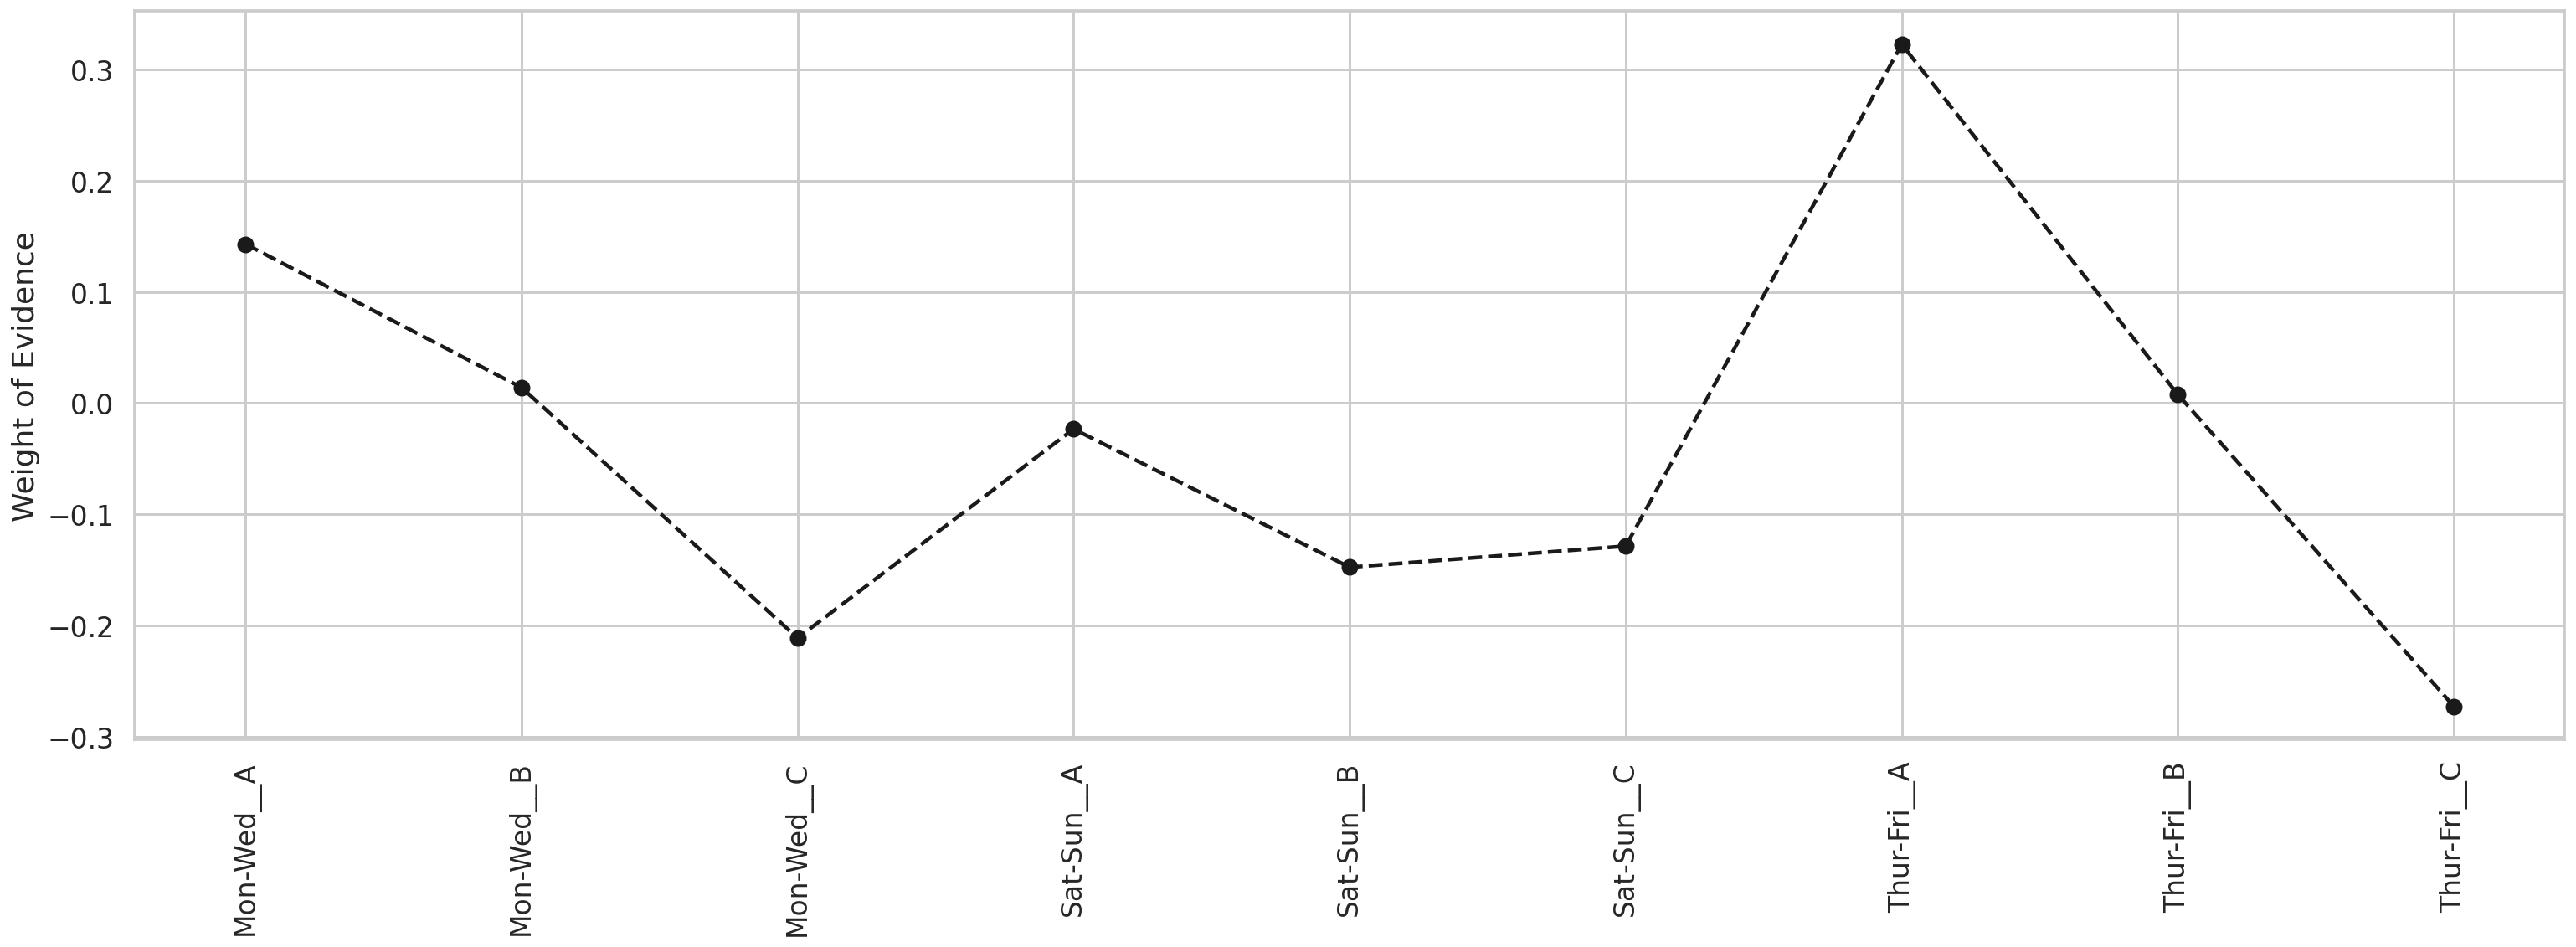

In [ ]:
plot_by_woe(woe_num(data, 'Day_Time', 'GBFlag'), 90)

In [ ]:
#data['Day_Time_grped'] = np.where(data['Day_Time_grped'].isin(['Mon-Wed__2pm - 6pm']))


#### Salary Service

In [ ]:
data.head(1)

,BureauData,LoanId,AccountState,AccountSubstate,Product,CreationDate,DisbursementDate,DisbMonth,InitialDecision,InitialDecisionCode,ReasonCode_01,Age,DocumentType,DTI,EducationStatus,EmployerLGA,EmployerState,Gender,Income,Industry,LoanAmount,MaritalStatus,NoChildren,RepaymentBank,RepaymentMethod,AddresLGA,ResidentialStatus,Term,TimeEmploymentMM,TotalNumberAccountsInGoodStanding,TotalNumberOfAccounts,TotalMonthlyInstallments,TotalNumberOfAccountsInArrs,TotalNumberOfAccountsMoreThan90,HighestReportedMonthsInArrs,TotalNumberOfJudgments,TotalOutstandingDebt,TotalTimeAtAddress,WorstStatus,BusinessSector,EmploymentPosition,MaxDPD,(DueDate) FPD,FPD,Closeddate,MaturityDate,EarlySettlementFlg,WeekDay,DayOfTheMonth,timeindayselect,MobileNetwork,Email,ClientFullName,FirstRD,CreditScore,FirstDD,Channels,InterestRate,Acct_Duratn,clientID,Unnamed: 0,Product_y,2MinNumCreditWk,2MinCreditWk,averageDebit,averageCredit,averageBalance,AvgNumCreditWk,AvgNumDebitWk,AvgNumCreditMn,AvgNumDebitMn,Agency_Banking_Count_1,Agency_Banking_Count_2,Agency_Banking_Count_3,Agency_Banking_Count_4,Agency_Banking_Count_5,Agency_Banking_Count_6,Agency_Banking_Count_7,Airtime_Payments_Amnt_1,Airtime_Payments_Amnt_2,Airtime_Payments_Amnt_3,Airtime_Payments_Amnt_4,Airtime_Payments_Amnt_5,Airtime_Payments_Amnt_6,Airtime_Payments_Amnt_7,averageLoanRepayment,balanceMonth,bankChargesSum,Closing_balance,COT_SMS_Charge,Day_Diff_Debit,Day_Diff_Credit,IntlRemittancesAmnt1,IntlRemittancesAmnt2,IntlRemittancesAmnt3,IntlRemittancesAmnt4,IntlRemittancesAmnt5,IntlRemittancesAmnt6,IntlRemittancesAmnt7,IntlRemittancesFreq1,IntlRemittancesFreq2,IntlRemittancesFreq3,IntlRemittancesFreq4,IntlRemittancesFreq5,IntlRemittancesFreq6,IntlRemittancesFreq7,maximumBalance,maximumBalanceMonthly,maximumBalanceWeekly,medianBalanceMonthly,medianBalanceWeekly,minimumBalanceMonthly,minimumBalanceWeekly,minimumCreditWeekly,minimumDebitWeekly,minimumNumOfCreditWeekly,monthly_betting_credit_1,monthly_betting_credit_2,monthly_betting_credit_3,monthly_betting_credit_4,monthly_betting_credit_5,monthly_betting_credit_6,monthly_betting_credit_7,monthly_cash_flow_1,monthly_cash_flow_2,monthly_cash_flow_3,monthly_cash_flow_4,monthly_cash_flow_5,monthly_cash_flow_6,monthly_cash_flow_7,monthly_electricity_spending_1,monthly_electricity_spending_2,monthly_electricity_spending_3,monthly_electricity_spending_4,monthly_electricity_spending_5,monthly_electricity_spending_6,monthly_electricity_spending_7,monthly_netflix_spending_1,monthly_netflix_spending_2,monthly_netflix_spending_3,monthly_netflix_spending_4,monthly_netflix_spending_5,monthly_netflix_spending_6,monthly_netflix_spending_7,Opening_balance,POSVolume1,POSVolume2,POSVolume3,POSVolume4,POSVolume5,POSVolume6,POSVolume7,Salary_Amount,TitheAmt1,TitheAmt2,TitheAmt3,TitheAmt4,TitheAmt5,TitheAmt6,TitheAmt7,TitheFreq1,TitheFreq2,TitheFreq3,total_cash_flow,total_loan_repayment_1,total_loan_repayment_2,total_loan_repayment_3,total_loan_repayment_4,total_loan_repayment_5,total_loan_repayment_6,total_loan_repayment_7,totalDebit,totalCredit,Vol_ATM_Transactions_Count1,Vol_ATM_Transactions_Count2,Vol_ATM_Transactions_Count3,Vol_ATM_Transactions_Count4,Vol_ATM_Transactions_Count5,Vol_ATM_Transactions_Count6,Vol_ATM_Transactions_Count7,International_Remittances_Freq_1,International_Remittances_Freq_2,International_Remittances_Freq_3,International_Remittances_Freq_4,International_Remittances_Freq_5,International_Remittances_Freq_6,International_Remittances_Freq_7,International_Remittances_Amnt_1,International_Remittances_Amnt_2,International_Remittances_Amnt_3,International_Remittances_Amnt_4,International_Remittances_Amnt_5,International_Remittances_Amnt_6,International_Remittances_Amnt_7,Pension_Remittances_Amnt_1,Pension_Remittances_Amnt_2,Pension_Remittances_Amnt_3,Pension_Remittances_Amnt_4,Pension_Remittances_Amnt_5,Pension_Remittances_Amnt_6,Pension_Remittances_Amnt_7,School_Fees_Amnt_1,School_Fees_Amnt_2,School_Fees_Amnt_3,School_Fees_Amnt_4,School_Fees_Amnt_5

In [ ]:
# col = [col for col in data.select_dtypes(include=['int', 'float']).columns ]
# data[col] = data[col].fillna(0)

In [ ]:
# Get all grouped variables
variables = [col for col in data.columns if '_y' in col]
data.drop(variables, axis=1, inplace=True)

data.columns = data.columns.str.replace("_x", "")

In [ ]:
a =pd.qcut(data['total_debit_4'], q=4, precision=0, duplicates='drop')
a.value_counts()

(-1.0, 56925.0]           999
(56925.0, 152331.0]       998
(152331.0, 405830.0]      998
(405830.0, 22196470.0]    998
Name: total_debit_4, dtype: int64

In [ ]:
# # Newly Derived Variables

 
#
data['r_avCredit_avDebit'] = round(data['averageCredit'] /data['averageDebit'],1)
       
    
# Ratio of last submitted full month credit and debit
data['r_CreditLM_avDebitLM'] = round(data['total_debit_2']/data['total_credit_2'],1)

# Ratio of average number of credit and debit accross months
data['r_avNumCrM_avNumDe_M'] = round(data['AvgNumCreditMn']/data['AvgNumDebitMn'],1)


# Ratio of average number of credit and debit accross weeks
data['r_avNumCrW_avNumDe_W'] = round(data['AvgNumCreditWk']/data['AvgNumDebitWk'],1)


## Average loan repayment in the last 3 full months 
data['avLoanRep_L3M'] = round(data[['total_loan_repayment_2','total_loan_repayment_3','total_loan_repayment_4']].mean(axis=1),1)


# # Debit ratio of last full month and last third month 
data['r_DebitLM_DebitL3M'] = round(data['total_debit_2']/data['total_debit_4'],1)




# POS transaction volume Ratio of last full month and last third month 
data['r_PosVolLM_PosVolBe3M'] = round(data['POSVolume2']/data['POSVolume4'],1)


# ATM transactions volume Ratio of last full month and last third month 
data['r_ATMtrLM_ATMtrBe3M'] = round(data['Vol_ATM_Transactions_Count2']/data['Vol_ATM_Transactions_Count4'],1)    


# Average Debit Amount
data['avDebitAmount'] = round(data['AvgDebitMn']/data['AvgNumDebitMn'],1)

# Average Credit Amount
data['avCreditAmountMn'] = round(data['AvgCreditMn']/data['AvgNumCreditMn'],1)


# Highes Single Debit in the last full 3 months
data['HighestSingleDebitL3M'] = round(data[['highest_single_debit_amount_2','highest_single_debit_amount_3','highest_single_debit_amount_4']].max(axis=1),1)



# data['age_DebitAmount'] = data['Age_binned'].astype(str) + "__" + data['total_debit_2_binned'].astype(str)
# data['age_DebitAmount'].value_counts()

## Bin Higheset Single Debit
# # data['HighestSingleDebitL3M_binned'] = pd.qcut(data['HighestSingleDebitL3M'], q=4, precision=0, duplicates='drop', labels=['Less than 40K', '40K-82K', '82K-200k','200K-High'])
# data['AGE_HSD_L3M'] = data['Age_binned'].astype(str) + "__" + data['HighestSingleDebitL3M_binned'].astype(str)


data['AddressLGA_r_avCredit_avDebit'] = data['AddresLGA_grped'] + "__" + data['r_avCredit_avDebit'].astype(str)
data['AddressLGA_r_CrLM_avDeLM'] = data['AddresLGA_grped'] + "__" + data['r_CreditLM_avDebitLM'].astype(str)

#### FAI & PIR

In [ ]:
pd.qcut(data['HighestSingleDebitL3M'], q=4)

0          (96950.0, 200000.0]
1          (96950.0, 200000.0]
2          (96950.0, 200000.0]
3          (96950.0, 200000.0]
4          (48413.25, 96950.0]
5          (96950.0, 200000.0]
6       (200000.0, 23809000.0]
7       (200000.0, 23809000.0]
8       (200000.0, 23809000.0]
9          (854.299, 48413.25]
10         (96950.0, 200000.0]
11         (48413.25, 96950.0]
12      (200000.0, 23809000.0]
13         (854.299, 48413.25]
14         (854.299, 48413.25]
15         (48413.25, 96950.0]
16      (200000.0, 23809000.0]
17         (96950.0, 200000.0]
18      (200000.0, 23809000.0]
19         (854.299, 48413.25]
20         (96950.0, 200000.0]
21      (200000.0, 23809000.0]
22         (96950.0, 200000.0]
23         (854.299, 48413.25]
24         (854.299, 48413.25]
25         (854.299, 48413.25]
26      (200000.0, 23809000.0]
27         (96950.0, 200000.0]
28         (48413.25, 96950.0]
29         (48413.25, 96950.0]
30         (96950.0, 200000.0]
31      (200000.0, 23809000.0]
32      

In [ ]:
# # # Binned last full month and last third month total debit
data['total_debit_2_binned'] = np.where(data['total_debit_2']<213000, 'Less than 213K',
                                np.where(data['total_debit_2'].between(212999, 465000),  '213K - 465K',
                                np.where(data['total_debit_2'].between(465000, 968000),  '465K-968K','968K-High')))


data['total_debit_4_binned'] = np.where(data['total_debit_4']< 57000, 'Less than 57K',
                                np.where(data['total_debit_4'].between(57000, 152000),  '57K-152K',
                                np.where(data['total_debit_4'].between(152000, 405000),  '153K-405K','405K-High')))



data['DebitLM_DebitL3M_bin'] = data['total_debit_2_binned'].astype(str) + "__" + data['total_debit_4_binned'].astype(str)
data['total_debit_2'].min()

data['age_DebitAmount'] = data['Age_binned'].astype(str) + "__" + data['total_debit_2_binned'].astype(str)
data['age_DebitAmount'].value_counts()

## Bin Higheset Single Debit
data['HighestSingleDebitL3M_binned'] = np.where(data['HighestSingleDebitL3M']< 49000, 'Less than 49K',
                                np.where(data['HighestSingleDebitL3M'].between(49000, 97000),  '49K-97K',
                                np.where(data['HighestSingleDebitL3M'].between(97000, 200000),  '97K-200k','200K-High')))


data['AGE_HSD_L3M'] = data['Age_binned'].astype(str) + "__" + data['HighestSingleDebitL3M_binned'].astype(str)

data['AddressLGA_HSD_L3M'] = data['AddresLGA_grped'] + "__" + data['HighestSingleDebitL3M_binned'].astype(str)


# # Customer debit pattern from last full month to last third month
data['DebitLM_DebitL3M_bin'] = data['total_debit_2_binned'].astype(str) + "__" + data['total_debit_4_binned'].astype(str)
data['total_debit_2'].min()


0.47

In [ ]:
# A function to quickly search for variables in large dataframe
def search_variable(df, variable):
    res =  [col for col in df.columns if variable.lower() in col.lower()]
    if res:
        return res
    return 'Not Found in DataFrame'
  
  
search_variable(data, 'monthly_cash_flow_1')

['monthly_cash_flow_1']

In [ ]:

data_fai = compute_FAI(data, 'total_credit', 'total_debit','Opening_balance')

+ PIR_1 = (𝑇𝑜𝑡𝑎𝑙 𝐼𝑛𝑠𝑡𝑎𝑙𝑙𝑚𝑒𝑛𝑡 𝐴𝑚𝑜𝑢𝑛𝑡 𝑃𝑎𝑖𝑑)/(Current FAI +𝑇𝑜𝑡𝑎𝑙 𝐼𝑛𝑠𝑡𝑎𝑙𝑙𝑚𝑒𝑛𝑡 𝐴𝑚𝑜𝑢𝑛𝑡 𝑃𝑎𝑖𝑑)  - Current working definition

+ PIR_3 = (𝑇𝑜𝑡𝑎𝑙 𝑃𝑟𝑖𝑛𝑐𝑖𝑝𝑎𝑙 𝑅𝑒𝑐𝑒𝑖𝑣𝑒𝑑)/(𝐶𝑙𝑜𝑠𝑖𝑛𝑔 𝐵𝑎𝑙𝑎𝑛𝑐𝑒−𝑇𝑜𝑡𝑎𝑙 𝑃𝑟𝑖𝑛𝑐𝑖𝑝𝑎𝑙 𝑅𝑒𝑐𝑒𝑖𝑣𝑒𝑑)




In [ ]:
### Total Principal Received ???
# Loan Amount(Renmoney) + Top Up(if any) + Loan Amount (Other banks)
# Compute PIR_1 and PIR_3
data_fai['PIR_1'] = data_fai['loanRepaymentSum']/(data_fai['FAI_2'] + data_fai['loanRepaymentSum'])
#data_fai['PIR_3'] = data_fai[['LoanAmount','loanCreditSum','Top_up_Amount']].fillna(0).sum(axis=1)/(data_fai['Closing_balance'] - data_fai[['LoanAmount','loanCreditSum','Top_up_Amount']].fillna(0).sum(axis=1))

### Ratios

In [ ]:
data_fai.head(2)

,BureauData,LoanId,AccountState,AccountSubstate,Product,CreationDate,DisbursementDate,DisbMonth,InitialDecision,InitialDecisionCode,ReasonCode_01,Age,DocumentType,DTI,EducationStatus,EmployerLGA,EmployerState,Gender,Income,Industry,LoanAmount,MaritalStatus,NoChildren,RepaymentBank,RepaymentMethod,AddresLGA,ResidentialStatus,Term,TimeEmploymentMM,TotalNumberAccountsInGoodStanding,TotalNumberOfAccounts,TotalMonthlyInstallments,TotalNumberOfAccountsInArrs,TotalNumberOfAccountsMoreThan90,HighestReportedMonthsInArrs,TotalNumberOfJudgments,TotalOutstandingDebt,TotalTimeAtAddress,WorstStatus,BusinessSector,EmploymentPosition,MaxDPD,(DueDate) FPD,FPD,Closeddate,MaturityDate,EarlySettlementFlg,WeekDay,DayOfTheMonth,timeindayselect,MobileNetwork,Email,ClientFullName,FirstRD,CreditScore,FirstDD,Channels,InterestRate,Acct_Duratn,clientID,Unnamed: 0,2MinNumCreditWk,2MinCreditWk,averageDebit,averageCredit,averageBalance,AvgNumCreditWk,AvgNumDebitWk,AvgNumCreditMn,AvgNumDebitMn,Agency_Banking_Count_1,Agency_Banking_Count_2,Agency_Banking_Count_3,Agency_Banking_Count_4,Agency_Banking_Count_5,Agency_Banking_Count_6,Agency_Banking_Count_7,Airtime_Payments_Amnt_1,Airtime_Payments_Amnt_2,Airtime_Payments_Amnt_3,Airtime_Payments_Amnt_4,Airtime_Payments_Amnt_5,Airtime_Payments_Amnt_6,Airtime_Payments_Amnt_7,averageLoanRepayment,balanceMonth,bankChargesSum,Closing_balance,COT_SMS_Charge,Day_Diff_Debit,Day_Diff_Credit,IntlRemittancesAmnt1,IntlRemittancesAmnt2,IntlRemittancesAmnt3,IntlRemittancesAmnt4,IntlRemittancesAmnt5,IntlRemittancesAmnt6,IntlRemittancesAmnt7,IntlRemittancesFreq1,IntlRemittancesFreq2,IntlRemittancesFreq3,IntlRemittancesFreq4,IntlRemittancesFreq5,IntlRemittancesFreq6,IntlRemittancesFreq7,maximumBalance,maximumBalanceMonthly,maximumBalanceWeekly,medianBalanceMonthly,medianBalanceWeekly,minimumBalanceMonthly,minimumBalanceWeekly,minimumCreditWeekly,minimumDebitWeekly,minimumNumOfCreditWeekly,monthly_betting_credit_1,monthly_betting_credit_2,monthly_betting_credit_3,monthly_betting_credit_4,monthly_betting_credit_5,monthly_betting_credit_6,monthly_betting_credit_7,monthly_cash_flow_1,monthly_cash_flow_2,monthly_cash_flow_3,monthly_cash_flow_4,monthly_cash_flow_5,monthly_cash_flow_6,monthly_cash_flow_7,monthly_electricity_spending_1,monthly_electricity_spending_2,monthly_electricity_spending_3,monthly_electricity_spending_4,monthly_electricity_spending_5,monthly_electricity_spending_6,monthly_electricity_spending_7,monthly_netflix_spending_1,monthly_netflix_spending_2,monthly_netflix_spending_3,monthly_netflix_spending_4,monthly_netflix_spending_5,monthly_netflix_spending_6,monthly_netflix_spending_7,Opening_balance,POSVolume1,POSVolume2,POSVolume3,POSVolume4,POSVolume5,POSVolume6,POSVolume7,Salary_Amount,TitheAmt1,TitheAmt2,TitheAmt3,TitheAmt4,TitheAmt5,TitheAmt6,TitheAmt7,TitheFreq1,TitheFreq2,TitheFreq3,total_cash_flow,total_loan_repayment_1,total_loan_repayment_2,total_loan_repayment_3,total_loan_repayment_4,total_loan_repayment_5,total_loan_repayment_6,total_loan_repayment_7,totalDebit,totalCredit,Vol_ATM_Transactions_Count1,Vol_ATM_Transactions_Count2,Vol_ATM_Transactions_Count3,Vol_ATM_Transactions_Count4,Vol_ATM_Transactions_Count5,Vol_ATM_Transactions_Count6,Vol_ATM_Transactions_Count7,International_Remittances_Freq_1,International_Remittances_Freq_2,International_Remittances_Freq_3,International_Remittances_Freq_4,International_Remittances_Freq_5,International_Remittances_Freq_6,International_Remittances_Freq_7,International_Remittances_Amnt_1,International_Remittances_Amnt_2,International_Remittances_Amnt_3,International_Remittances_Amnt_4,International_Remittances_Amnt_5,International_Remittances_Amnt_6,International_Remittances_Amnt_7,Pension_Remittances_Amnt_1,Pension_Remittances_Amnt_2,Pension_Remittances_Amnt_3,Pension_Remittances_Amnt_4,Pension_Remittances_Amnt_5,Pension_Remittances_Amnt_6,Pension_Remittances_Amnt_7,School_Fees_Amnt_1,School_Fees_Amnt_2,School_Fees_Amnt_3,School_Fees_Amnt_4,School_Fees_Amnt_5,School_Fe

#### Average monthly cash flow

In [ ]:
cols = [ 'monthly_cash_flow_2', 'monthly_cash_flow_3', 'monthly_cash_flow_4']

data_fai['avg_Monthly_cash_flow'] =  data_fai[cols].mean(axis=1)

#### Average POSVolume

In [ ]:
cols = ['POSVolume2', 'POSVolume3', 'POSVolume4']

data_fai['avg_POSVolume'] =  data_fai[cols].mean(axis=1)

#### Average banking frequency

In [ ]:
cols = ['Banking_Fees_Freq_2', 'Banking_Fees_Freq_3', 'Banking_Fees_Freq_4']

data_fai['avg_Banking_Fees_Freq'] =  data_fai[cols].mean(axis=1)

#### Average TV frequency

In [ ]:
cols = ['Tv_freq_2', 'Tv_freq_3', 'Tv_freq_4']

data_fai['avg_Tv_freq'] =  data_fai[cols].mean(axis=1)

#### Average tax payment amount

In [ ]:

cols = ['Tax_Payments_Amnt_2', 'Tax_Payments_Amnt_3', 'Tax_Payments_Amnt_4']

data_fai['avg_Tax_Payments_Amnt'] =  data_fai[cols].mean(axis=1)

#### Average tax payment Frequency

In [ ]:

cols = ['Tax_Payments_Freq_2', 'Tax_Payments_Freq_3', 'Tax_Payments_Freq_4']

data_fai['avg_Tax_Payments_Freq'] =  data_fai[cols].mean(axis=1)

In [ ]:
data[['Merchant_debit_freq_2', 'Merchant_debit_freq_3', 'Merchant_debit_freq_4', 'Geo_freq_2', 'Geo_freq_3', 'Geo_freq_4']].head(5)

,Merchant_debit_freq_2,Merchant_debit_freq_3,Merchant_debit_freq_4,Geo_freq_2,Geo_freq_3,Geo_freq_4
0,201.000,137.000,147.000,201.000,137.000,147.000
1,349.000,459.000,186.000,349.000,459.000,186.000
2,68.000,36.000,8.000,68.000,36.000,8.000
3,69.000,86.000,69.000,69.000,86.000,69.000
4,49.000,22.000,28.000,49.000,22.000,28.000


#### Average Volume of customers credit transaction from Month1  to the most recent month; where credit transaction amount > 10,000


In [ ]:
search_variable(data, 'Vol_gr_eq_4')

['Vol_gr_eq_4']

In [ ]:

cols = ['Vol_gr_eq_4', 'Vol_gr_eq_2', 'Vol_gr_eq_3']

data_fai['avg_Vol_gr_eq'] =  data_fai[cols].mean(axis=1)

#### Average credit amount

In [ ]:


cols = ['Vol_of_cre_amt_2', 'Vol_of_cre_amt_3', 'Vol_of_cre_amt_4']

data_fai['avg_Vol_of_cre_amt'] =  data_fai[cols].mean(axis=1)

#### Average highest single credit amount

In [ ]:


cols = ['highest_single_credit_amount_2', 'highest_single_credit_amount_3', 'highest_single_credit_amount_4']

data_fai['avg_highest_single_credit_amount'] =  data_fai[cols].mean(axis=1)

#### Average highest single debit amount

In [ ]:

cols = ['highest_single_debit_amount_2', 'highest_single_debit_amount_3', 'highest_single_debit_amount_4']

data_fai['avg_highest_single_debit_amount'] =  data_fai[cols].mean(axis=1)


In [ ]:
data.AccountState.value_counts()

CLOSED                2991
CLOSED_WRITTEN_OFF    1004
ACTIVE_IN_ARREARS       21
Name: AccountState, dtype: int64

In [ ]:
d = data.dropna(subset=cols[:4], how='any')
d.shape

(3993, 618)

In [ ]:
data_fai.head(2)

,BureauData,LoanId,AccountState,AccountSubstate,Product,CreationDate,DisbursementDate,DisbMonth,InitialDecision,InitialDecisionCode,ReasonCode_01,Age,DocumentType,DTI,EducationStatus,EmployerLGA,EmployerState,Gender,Income,Industry,LoanAmount,MaritalStatus,NoChildren,RepaymentBank,RepaymentMethod,AddresLGA,ResidentialStatus,Term,TimeEmploymentMM,TotalNumberAccountsInGoodStanding,TotalNumberOfAccounts,TotalMonthlyInstallments,TotalNumberOfAccountsInArrs,TotalNumberOfAccountsMoreThan90,HighestReportedMonthsInArrs,TotalNumberOfJudgments,TotalOutstandingDebt,TotalTimeAtAddress,WorstStatus,BusinessSector,EmploymentPosition,MaxDPD,(DueDate) FPD,FPD,Closeddate,MaturityDate,EarlySettlementFlg,WeekDay,DayOfTheMonth,timeindayselect,MobileNetwork,Email,ClientFullName,FirstRD,CreditScore,FirstDD,Channels,InterestRate,Acct_Duratn,clientID,Unnamed: 0,2MinNumCreditWk,2MinCreditWk,averageDebit,averageCredit,averageBalance,AvgNumCreditWk,AvgNumDebitWk,AvgNumCreditMn,AvgNumDebitMn,Agency_Banking_Count_1,Agency_Banking_Count_2,Agency_Banking_Count_3,Agency_Banking_Count_4,Agency_Banking_Count_5,Agency_Banking_Count_6,Agency_Banking_Count_7,Airtime_Payments_Amnt_1,Airtime_Payments_Amnt_2,Airtime_Payments_Amnt_3,Airtime_Payments_Amnt_4,Airtime_Payments_Amnt_5,Airtime_Payments_Amnt_6,Airtime_Payments_Amnt_7,averageLoanRepayment,balanceMonth,bankChargesSum,Closing_balance,COT_SMS_Charge,Day_Diff_Debit,Day_Diff_Credit,IntlRemittancesAmnt1,IntlRemittancesAmnt2,IntlRemittancesAmnt3,IntlRemittancesAmnt4,IntlRemittancesAmnt5,IntlRemittancesAmnt6,IntlRemittancesAmnt7,IntlRemittancesFreq1,IntlRemittancesFreq2,IntlRemittancesFreq3,IntlRemittancesFreq4,IntlRemittancesFreq5,IntlRemittancesFreq6,IntlRemittancesFreq7,maximumBalance,maximumBalanceMonthly,maximumBalanceWeekly,medianBalanceMonthly,medianBalanceWeekly,minimumBalanceMonthly,minimumBalanceWeekly,minimumCreditWeekly,minimumDebitWeekly,minimumNumOfCreditWeekly,monthly_betting_credit_1,monthly_betting_credit_2,monthly_betting_credit_3,monthly_betting_credit_4,monthly_betting_credit_5,monthly_betting_credit_6,monthly_betting_credit_7,monthly_cash_flow_1,monthly_cash_flow_2,monthly_cash_flow_3,monthly_cash_flow_4,monthly_cash_flow_5,monthly_cash_flow_6,monthly_cash_flow_7,monthly_electricity_spending_1,monthly_electricity_spending_2,monthly_electricity_spending_3,monthly_electricity_spending_4,monthly_electricity_spending_5,monthly_electricity_spending_6,monthly_electricity_spending_7,monthly_netflix_spending_1,monthly_netflix_spending_2,monthly_netflix_spending_3,monthly_netflix_spending_4,monthly_netflix_spending_5,monthly_netflix_spending_6,monthly_netflix_spending_7,Opening_balance,POSVolume1,POSVolume2,POSVolume3,POSVolume4,POSVolume5,POSVolume6,POSVolume7,Salary_Amount,TitheAmt1,TitheAmt2,TitheAmt3,TitheAmt4,TitheAmt5,TitheAmt6,TitheAmt7,TitheFreq1,TitheFreq2,TitheFreq3,total_cash_flow,total_loan_repayment_1,total_loan_repayment_2,total_loan_repayment_3,total_loan_repayment_4,total_loan_repayment_5,total_loan_repayment_6,total_loan_repayment_7,totalDebit,totalCredit,Vol_ATM_Transactions_Count1,Vol_ATM_Transactions_Count2,Vol_ATM_Transactions_Count3,Vol_ATM_Transactions_Count4,Vol_ATM_Transactions_Count5,Vol_ATM_Transactions_Count6,Vol_ATM_Transactions_Count7,International_Remittances_Freq_1,International_Remittances_Freq_2,International_Remittances_Freq_3,International_Remittances_Freq_4,International_Remittances_Freq_5,International_Remittances_Freq_6,International_Remittances_Freq_7,International_Remittances_Amnt_1,International_Remittances_Amnt_2,International_Remittances_Amnt_3,International_Remittances_Amnt_4,International_Remittances_Amnt_5,International_Remittances_Amnt_6,International_Remittances_Amnt_7,Pension_Remittances_Amnt_1,Pension_Remittances_Amnt_2,Pension_Remittances_Amnt_3,Pension_Remittances_Amnt_4,Pension_Remittances_Amnt_5,Pension_Remittances_Amnt_6,Pension_Remittances_Amnt_7,School_Fees_Amnt_1,School_Fees_Amnt_2,School_Fees_Amnt_3,School_Fees_Amnt_4,School_Fees_Amnt_5,School_Fe

In [ ]:
data_fai.to_csv('Out of Sample data.csv')

In [ ]:
#data_fai.to_csv('\\\\10.0.10.20\\NetworkShare\\1. Active Projects\\Lite loans sc\\data\\processed\\3.0 lite loans data after feature engineering.csv')

In [ ]:
data_fai.shape

(4016, 618)